#### About the dataset:

The "Machine Downtime.csv" file contains the following columns, along with their first few rows of data:

1. Date: Date of the record (Data Type: Date).
2. Machine_ID: Identifier for the machine (Data Type: String).
3. Assembly_Line_No: Identifier for the assembly line (Data Type: String).
4. Hydraulic_Pressure(bar): Hydraulic pressure in bar (Data Type: Float).
5. Coolant_Pressure(bar): Coolant pressure in bar (Data Type: Float).
6. Air_System_Pressure(bar): Air system pressure in bar (Data Type: Float).
7. Coolant_Temperature: Temperature of the coolant (Data Type: Float).
8. Hydraulic_Oil_Temperature(°C): Temperature of the hydraulic oil in Celsius (Data Type: Float).
9. Spindle_Bearing_Temperature(°C): Temperature of the spindle bearing in Celsius (Data Type: Float).
10. Spindle_Vibration(µm): Spindle vibration in micrometers (Data Type: Float).
11. Tool_Vibration(µm): Tool vibration in micrometers (Data Type: Float).
12. Spindle_Speed(RPM): Spindle speed in revolutions per minute (Data Type: Integer).
13. Voltage(volts): Voltage in volts (Data Type: Integer).
14. Torque(Nm): Torque in Newton meters (Data Type: FLoat).
15. Cutting(kN): Cutting force in kiloNewtons (Data Type: FLoat).
16. Downtime: Status of the machine, indicating if it's experiencing downtime (Data Type: String).

Each row in this dataset appears to represent a record of various measurements and statuses for different machines at different times. The data seems to be a mix of continuous variables (like pressures, temperatures, vibrations, speeds, voltage, torque, and cutting force) and categorical variables (like machine ID, assembly line number, and downtime status).

Problem Statement:
- Correlation and how significant the correlation of each machine parameter with downtime status?
- Distribution of machine id and assembly line in each machine downtime status?

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import pointbiserialr

plt.style.use('ggplot')
%matplotlib inline

#### Data Understanding

In [3]:
df = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\360DigitTMG\\Project\\Machine Downtime.csv")

In [4]:
print(f'Number of total rows: {df.shape[0]}, Number of total columns: {df.shape[1]}')

Number of total rows: 2500, Number of total columns: 16


In [5]:
df.head()

Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  31-12-2021  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   
3  31-05-2022  Makino-L2-Unit1-2015     Shopfloor-L2                   139.34   
4  31-03-2022  Makino-L1-Unit1-2013     Shopfloor-L1                    60.51   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   
3               4.574382                  6.560394                 24.4   
4               6.893182                  6.141238                  4.1   

   Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
0                           46.0                             33.4   
1                           47.4                             34.6   
2                           40.7                             33.0   
3                           44.2                             40.6   
4                           47.3                             31.4   

   Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
0                  1.291              26.492             25892.0   
1                  1.382              25.274             19856.0   
2                  1.319              30.608             19851.0   
3                  0.618              30.791             18461.0   
4                  0.983              25.516             26526.0   

   Voltage(volts)  Torque(Nm)  Cutting(kN)         Downtime  
0           335.0   24.055326         3.58  Machine_Failure  
1           368.0   14.202890         2.68  Machine_Failure  
2           325.0   24.049267         3.55  Machine_Failure  
3           360.0   25.860029         3.55  Machine_Failure  
4           354.0   25.515874         3.55  Machine_Failure

In [6]:
df.tail()

Date            Machine_ID Assembly_Line_No  \
2495  01-02-2022  Makino-L1-Unit1-2013     Shopfloor-L1   
2496  01-02-2022  Makino-L1-Unit1-2013     Shopfloor-L1   
2497  01-02-2022  Makino-L2-Unit1-2015     Shopfloor-L2   
2498  01-02-2022  Makino-L3-Unit1-2015     Shopfloor-L3   
2499  01-02-2022  Makino-L2-Unit1-2015     Shopfloor-L2   

      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
2495               112.715506               5.220885   
2496               103.086653               5.211886   
2497               118.643165               5.212991   
2498               145.855859               5.207777   
2499                96.690000               5.936610   

      Air_System_Pressure(bar)  Coolant_Temperature  \
2495                  6.196610                 22.3   
2496                  7.074653                 11.9   
2497                  6.530049                  4.5   
2498                  6.402655                 12.2   
2499                  7.109355                 29.8   

      Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
2495                           48.8                             37.2   
2496                           48.3                             31.5   
2497                           49.9                             36.2   
2498                           44.5                             32.1   
2499                           53.2                             36.2   

      Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
2495                  0.910              20.282             20974.0   
2496                  1.106              34.708             20951.0   
2497                  0.288              16.828             20958.0   
2498                  0.995              26.498             20935.0   
2499                  0.840              31.580             23576.0   

      Voltage(volts)  Torque(Nm)  Cutting(kN)            Downtime  
2495           282.0   22.761610         2.72  No_Machine_Failure  
2496           319.0   22.786597         2.94  No_Machine_Failure  
2497           335.0   22.778987          NaN  No_Machine_Failure  
2498           376.0   22.804012         2.79  No_Machine_Failure  
2499           385.0   24.409551         3.55     Machine_Failure

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [8]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [9]:
df.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [10]:
df.isnull().mean()*100

Date                               0.00
Machine_ID                         0.00
Assembly_Line_No                   0.00
Hydraulic_Pressure(bar)            0.40
Coolant_Pressure(bar)              0.76
Air_System_Pressure(bar)           0.68
Coolant_Temperature                0.48
Hydraulic_Oil_Temperature(°C)      0.64
Spindle_Bearing_Temperature(°C)    0.28
Spindle_Vibration(µm)              0.44
Tool_Vibration(µm)                 0.44
Spindle_Speed(RPM)                 0.24
Voltage(volts)                     0.24
Torque(Nm)                         0.84
Cutting(kN)                        0.28
Downtime                           0.00
dtype: float64

In [11]:
df.duplicated().sum()

0

In [12]:
columns_to_check = [
    'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
    'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
    'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
    'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
    'Torque(Nm)', 'Cutting(kN)'
]

for column in columns_to_check:
    negative_values = df[df[column] < 0]
    if not negative_values.empty:
        print(f"Negative values found in {column}:")
        print(negative_values)

Negative values found in Hydraulic_Pressure(bar):
            Date            Machine_ID Assembly_Line_No  \
2058  06-02-2022  Makino-L3-Unit1-2015     Shopfloor-L3   

      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
2058               -14.326454               5.067261   

      Air_System_Pressure(bar)  Coolant_Temperature  \
2058                  6.163999                  6.8   

      Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
2058                           49.6                             39.2   

      Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
2058                  1.627              17.723             20386.0   

      Voltage(volts)  Torque(Nm)  Cutting(kN)            Downtime  
2058           348.0   33.923365         2.73  No_Machine_Failure  
Negative values found in Spindle_Vibration(µm):
           Date            Machine_ID Assembly_Line_No  \
222  28-02-2022  Makino-L2-Unit1-2015     Shopfloor-L2   

     Hydraulic_Pre

In [13]:
df.describe()

Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
count              2490.000000            2481.000000   
mean                101.409084               4.947058   
std                  30.289301               0.997357   
min                 -14.326454               0.325000   
25%                  76.355000               4.462464   
50%                  96.763486               4.939960   
75%                 126.415727               5.518401   
max                 191.000000              11.350000   

       Air_System_Pressure(bar)  Coolant_Temperature  \
count               2483.000000          2488.000000   
mean                   6.499275            18.559887   
std                    0.407279             8.554480   
min                    5.063480             4.100000   
25%                    6.217987            10.400000   
50%                    6.505191            21.200000   
75%                    6.780550            25.600000   
max                    7.973992            98.200000   

       Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
count                    2484.000000                      2493.000000   
mean                       47.618317                        35.063698   
std                         3.768674                         3.764823   
min                        35.200000                        22.600000   
25%                        45.100000                        32.500000   
50%                        47.700000                        35.100000   
75%                        50.100000                        37.600000   
max                        61.400000                        49.500000   

       Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
count            2489.000000         2489.000000         2494.000000   
mean                1.009334           25.411975        20274.792302   
std                 0.342898            6.437142         3852.660056   
min                -0.461000            2.161000            0.000000   
25%                 0.777000           21.089000        17919.000000   
50%                 1.008000           25.455000        20137.500000   
75%                 1.236000           29.790000        22501.750000   
max                 2.000000           45.726000        27957.000000   

       Voltage(volts)   Torque(Nm)  Cutting(kN)  
count     2494.000000  2479.000000  2493.000000  
mean       348.996792    25.234968     2.782551  
std         45.376024     6.138564     0.616688  
min        202.000000     0.000000     1.800000  
25%        319.000000    21.666115     2.250000  
50%        349.000000    24.647736     2.780000  
75%        380.000000    30.514008     3.270000  
max        479.000000    55.552400     3.930000

In [14]:
zero_values = {}
for column in columns_to_check:
    zero_count = (df[column] == 0).sum()
    if zero_count > 0:
        zero_values[column] = zero_count

print("Columns with zero values and their counts:")
print(zero_values)

Columns with zero values and their counts:
{'Spindle_Speed(RPM)': 7, 'Torque(Nm)': 2}


#### Data Cleaning

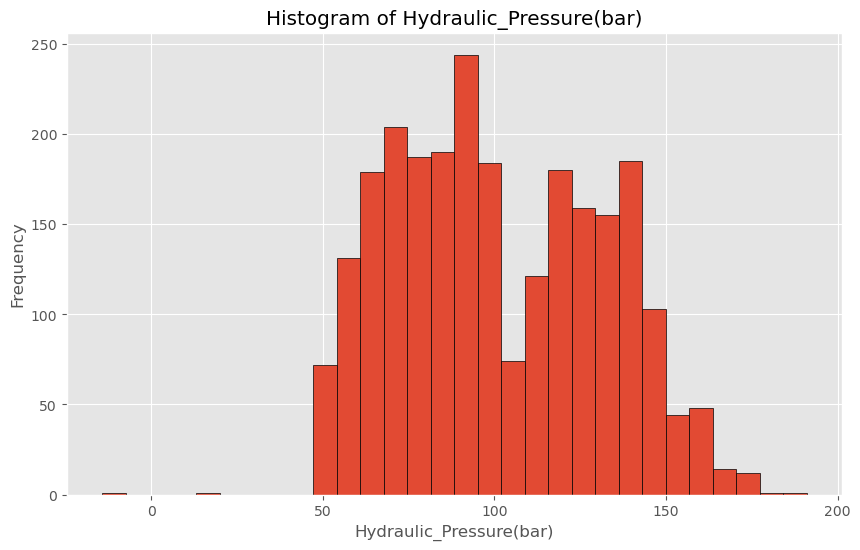

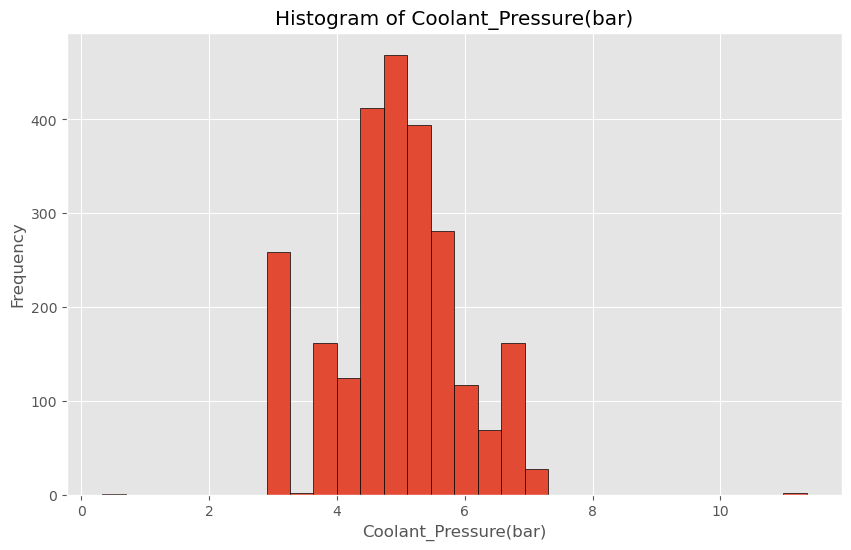

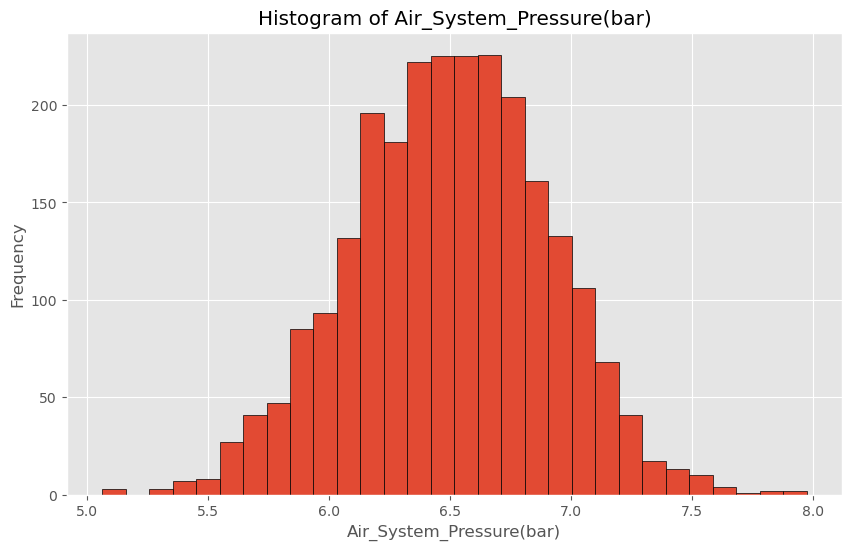

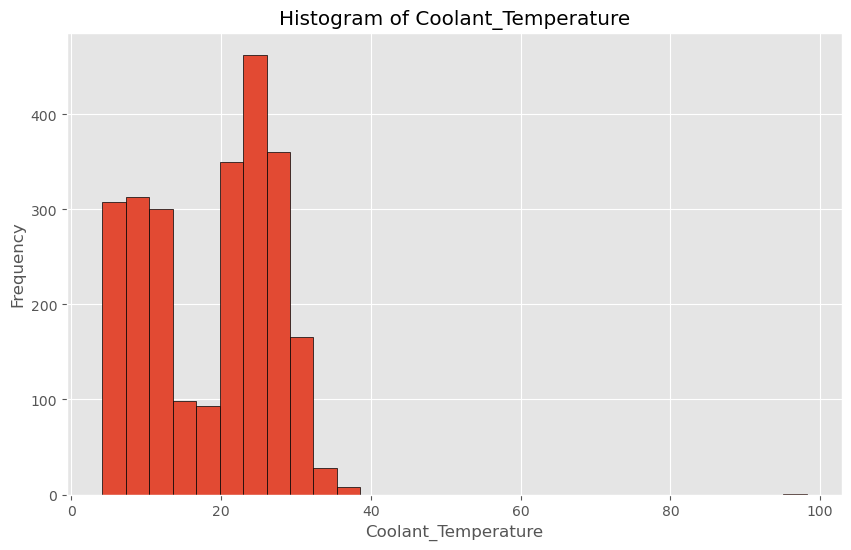

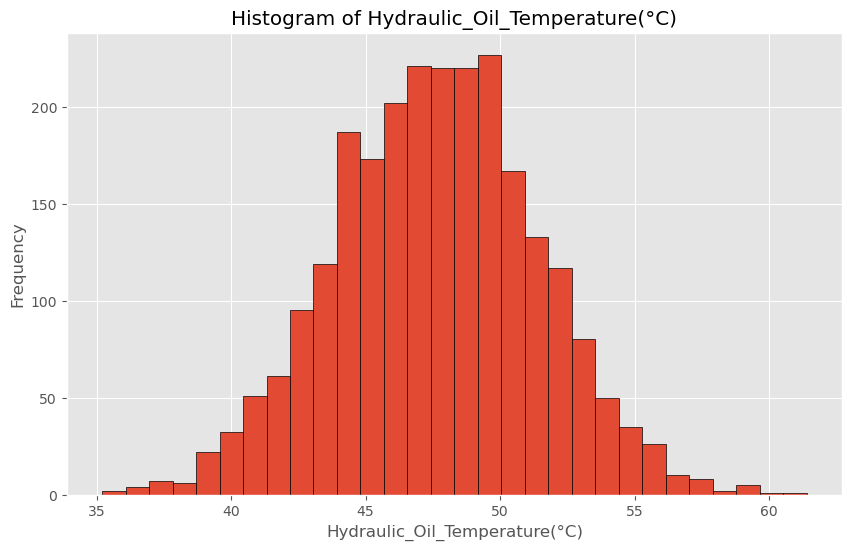

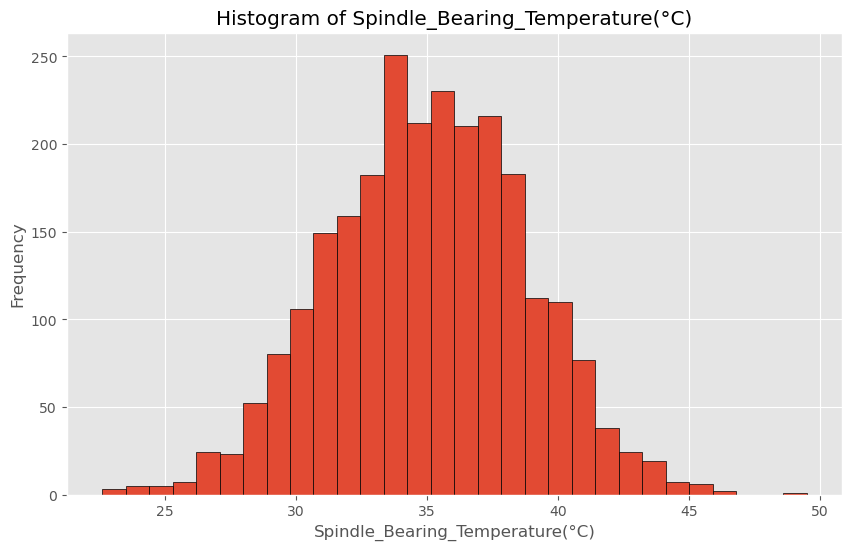

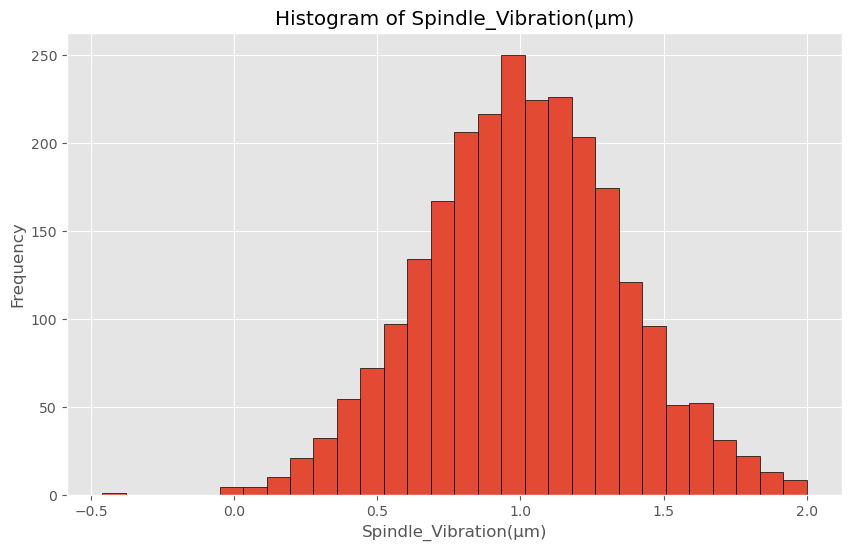

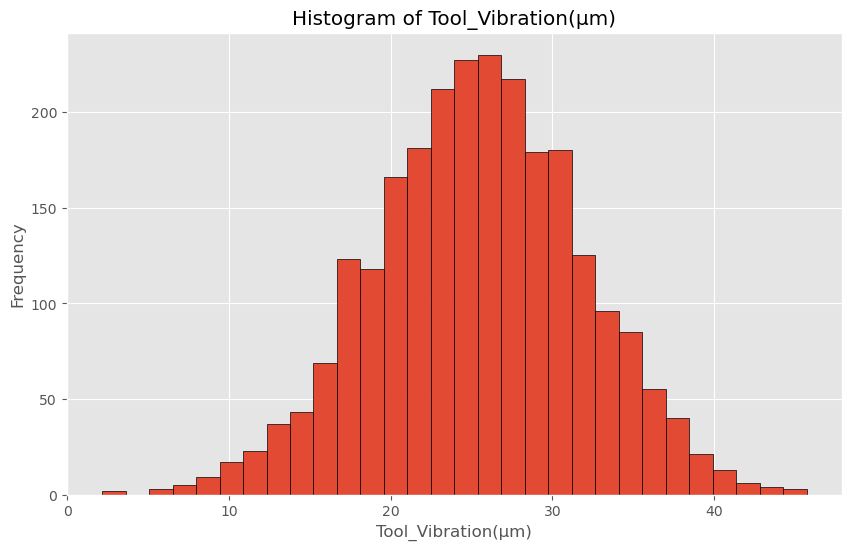

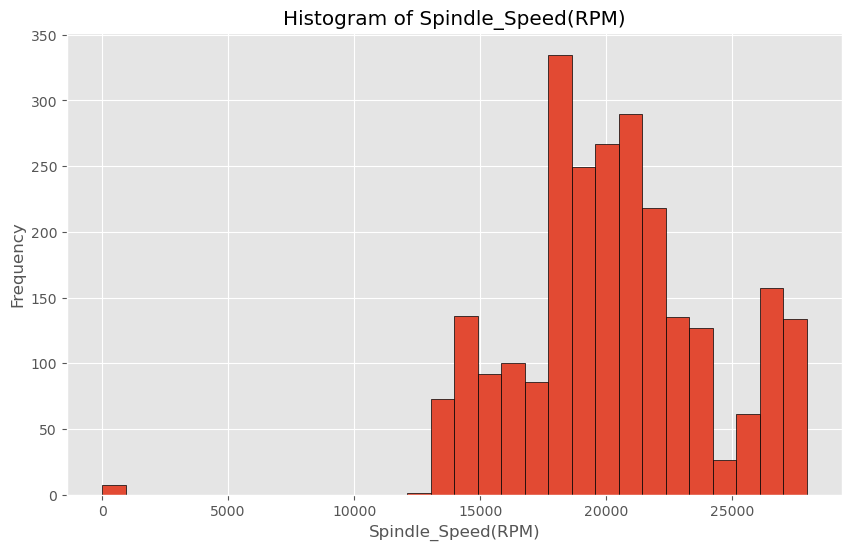

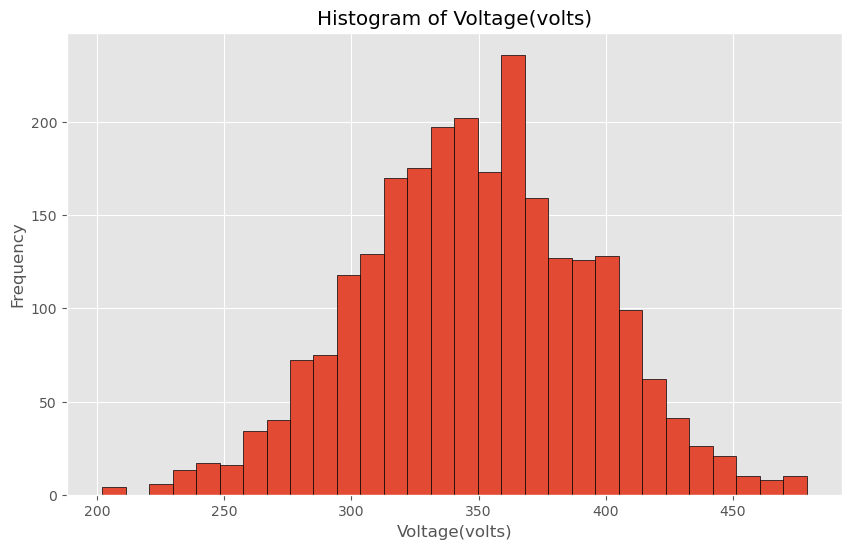

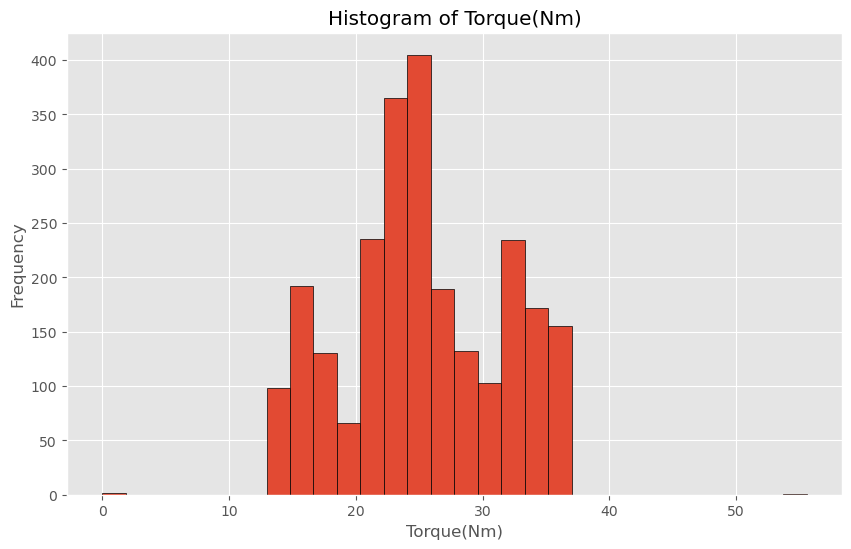

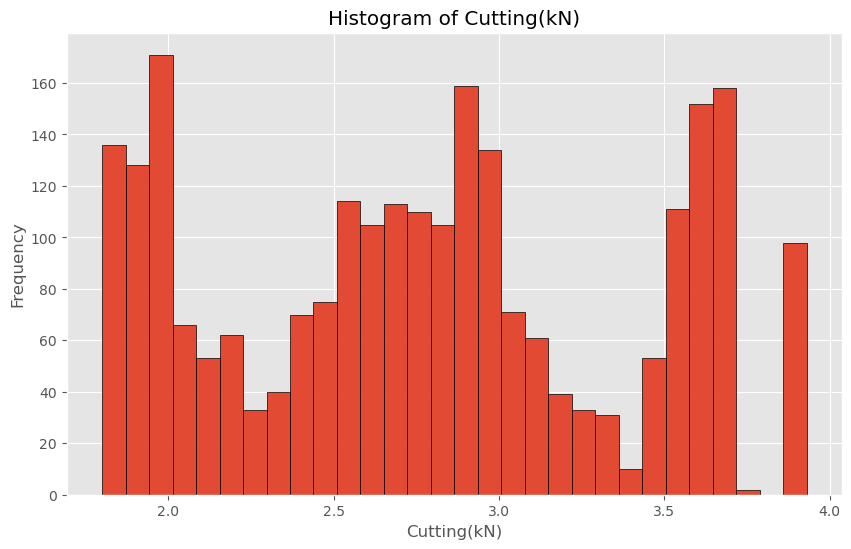

In [15]:
column_names = [
    'Hydraulic_Pressure(bar)','Coolant_Pressure(bar)','Air_System_Pressure(bar)',
    'Coolant_Temperature','Hydraulic_Oil_Temperature(°C)','Spindle_Bearing_Temperature(°C)',
    'Spindle_Vibration(µm)','Tool_Vibration(µm)','Spindle_Speed(RPM)','Voltage(volts)',
    'Torque(Nm)','Cutting(kN)'
]

for column in column_names:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [16]:
columns_to_interpolate = [
    'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
    'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
    'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
    'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
    'Torque(Nm)', 'Cutting(kN)'
]

for column in columns_to_interpolate:
    df[column] = df[column].interpolate(method='ffill').interpolate(method='bfill')

In [17]:
print(df[columns_to_interpolate].isnull().sum())

Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
dtype: int64


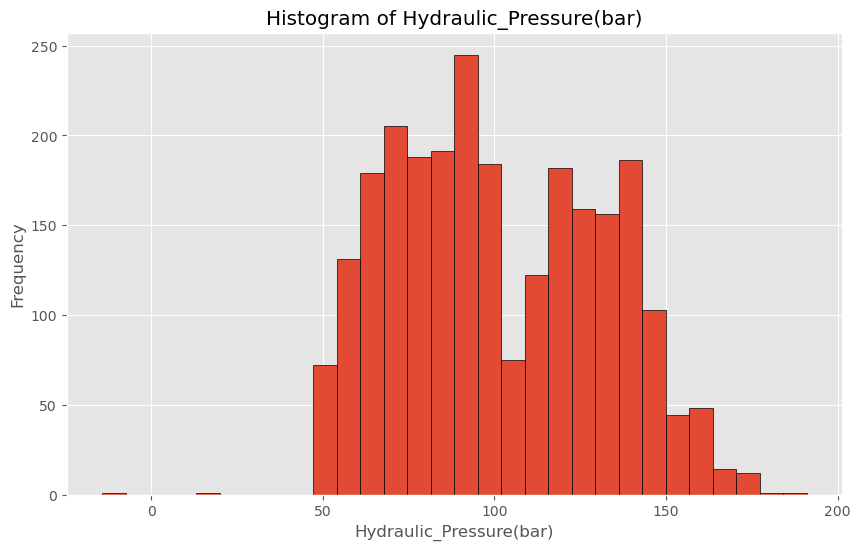

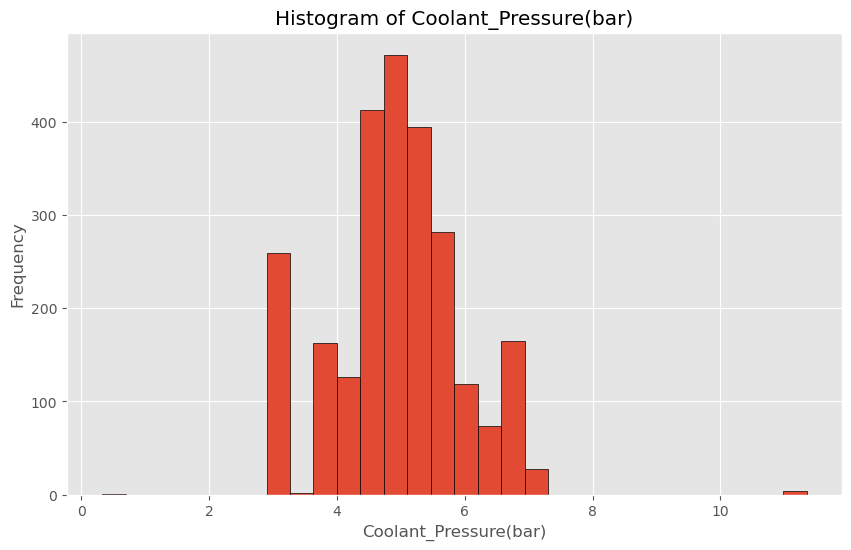

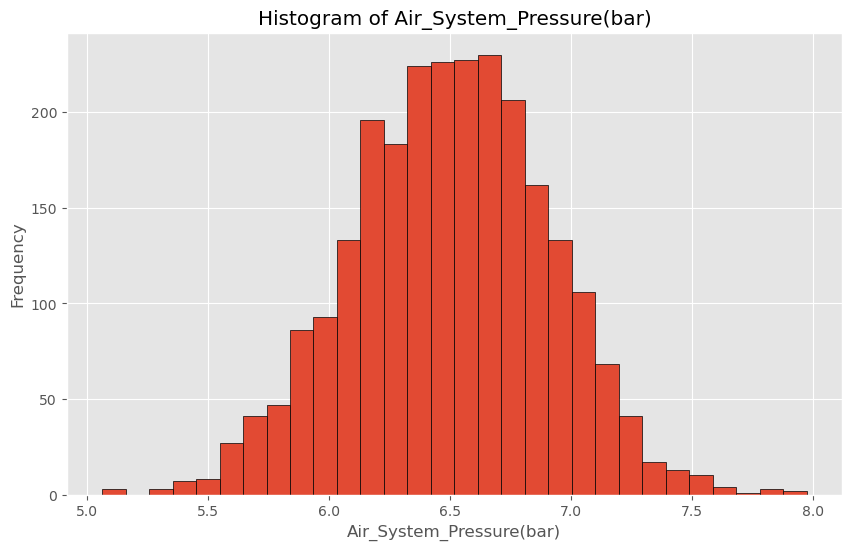

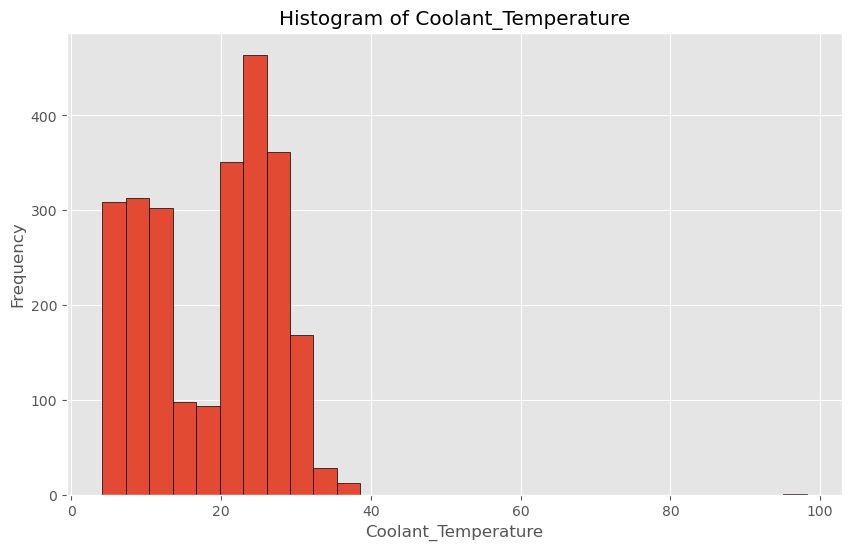

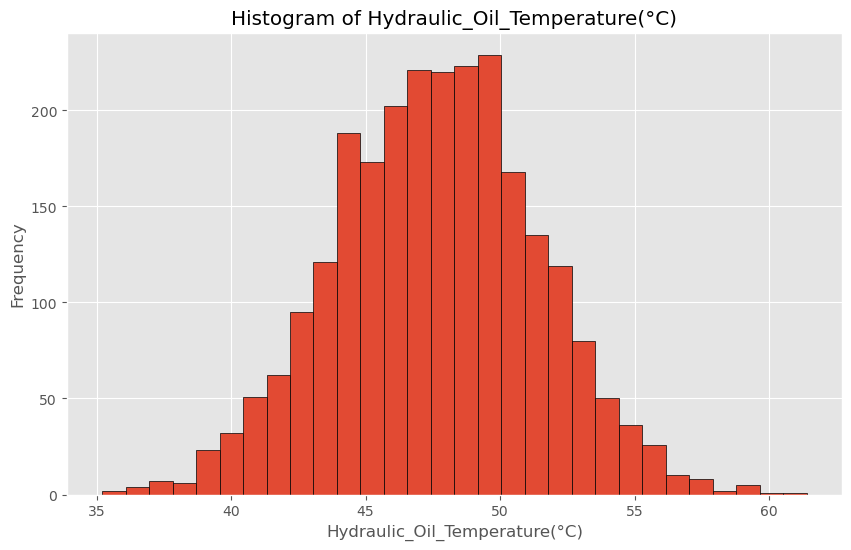

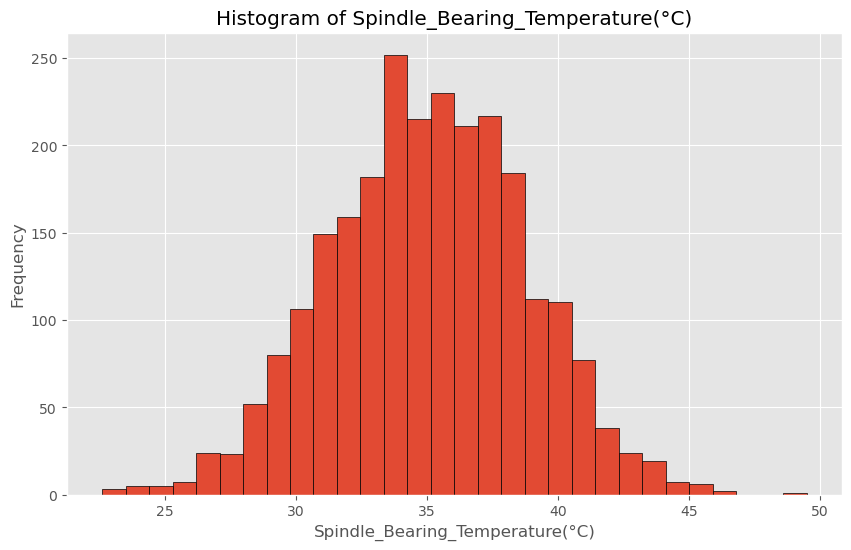

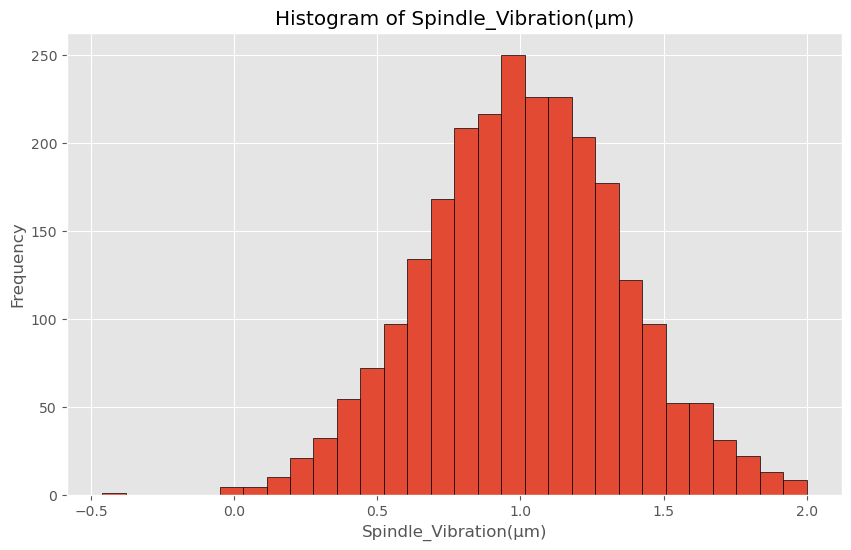

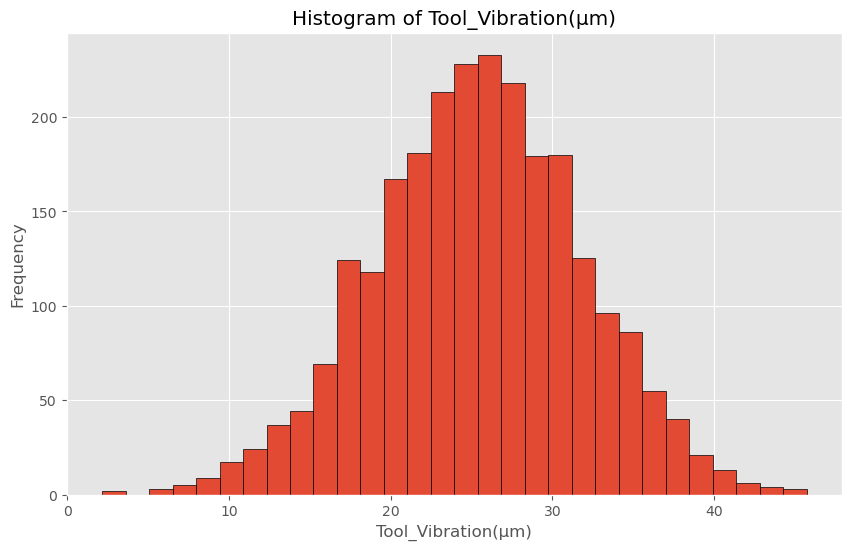

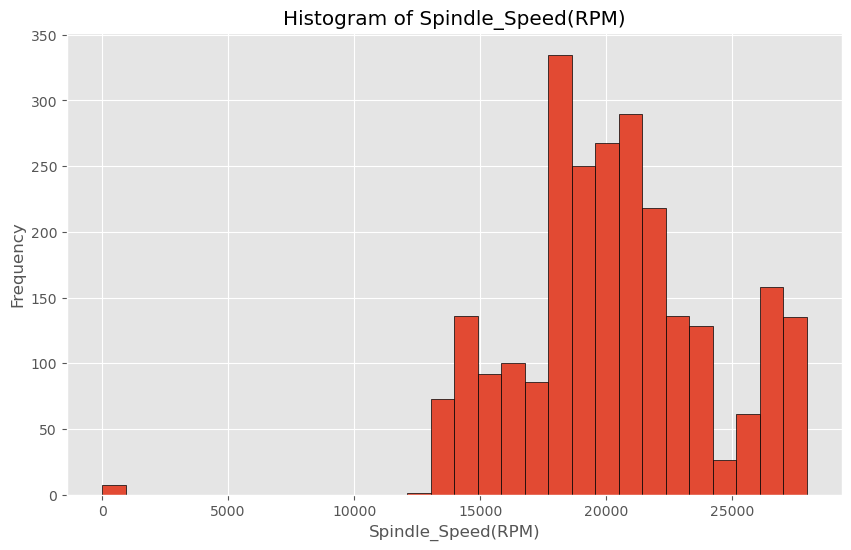

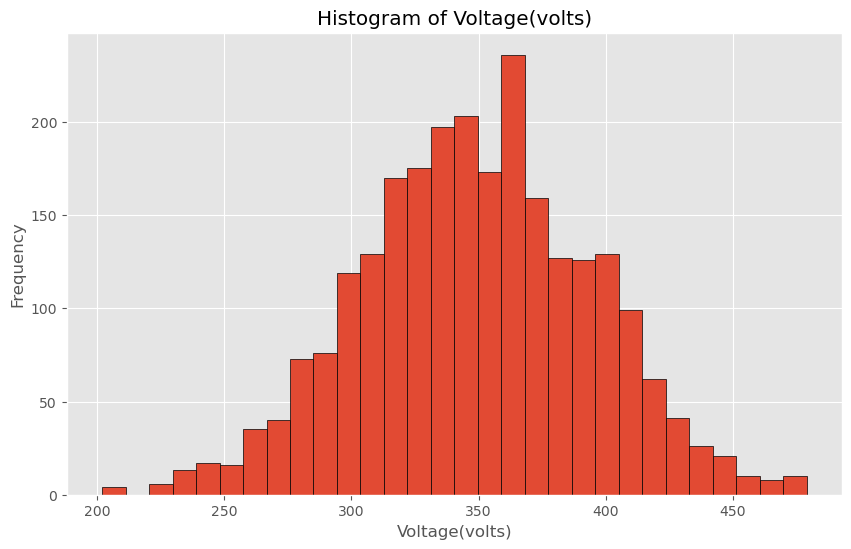

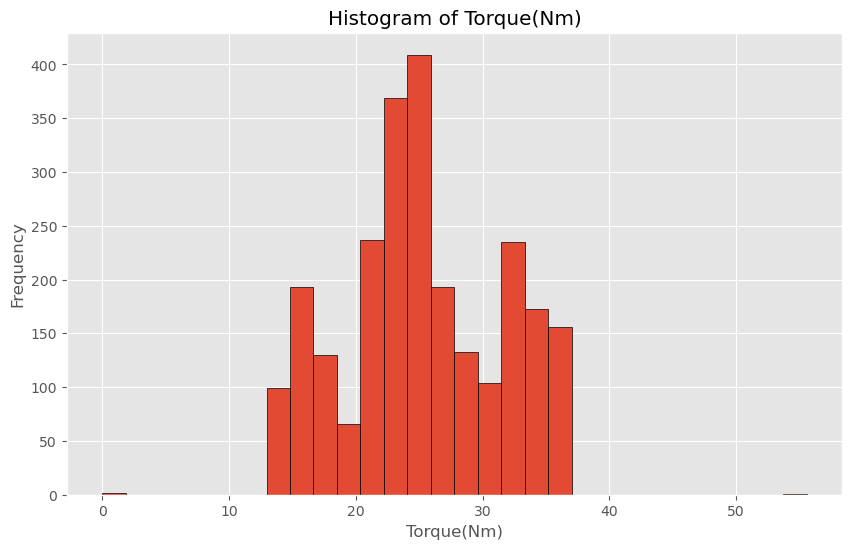

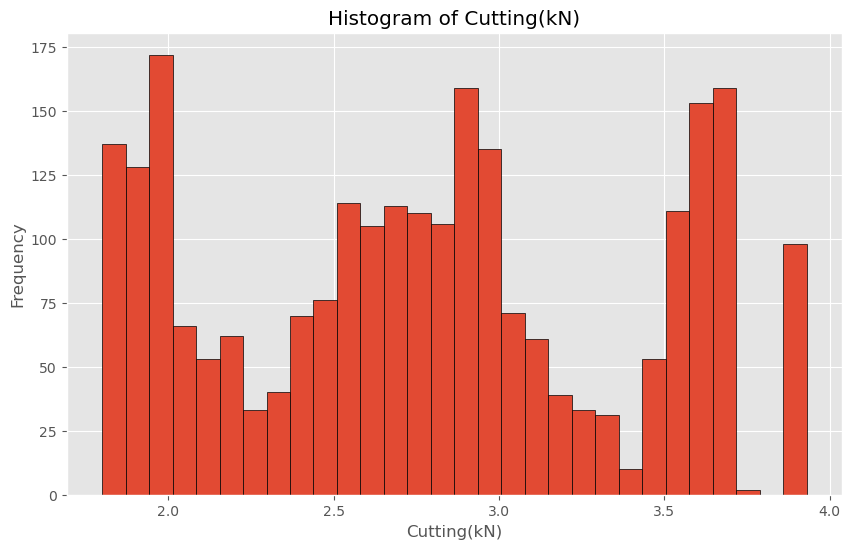

In [18]:
for column in columns_to_interpolate:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [19]:
df.isnull().sum()

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

In [20]:
df.tail()

Date            Machine_ID Assembly_Line_No  \
2495  01-02-2022  Makino-L1-Unit1-2013     Shopfloor-L1   
2496  01-02-2022  Makino-L1-Unit1-2013     Shopfloor-L1   
2497  01-02-2022  Makino-L2-Unit1-2015     Shopfloor-L2   
2498  01-02-2022  Makino-L3-Unit1-2015     Shopfloor-L3   
2499  01-02-2022  Makino-L2-Unit1-2015     Shopfloor-L2   

      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
2495               112.715506               5.220885   
2496               103.086653               5.211886   
2497               118.643165               5.212991   
2498               145.855859               5.207777   
2499                96.690000               5.936610   

      Air_System_Pressure(bar)  Coolant_Temperature  \
2495                  6.196610                 22.3   
2496                  7.074653                 11.9   
2497                  6.530049                  4.5   
2498                  6.402655                 12.2   
2499                  7.109355                 29.8   

      Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
2495                           48.8                             37.2   
2496                           48.3                             31.5   
2497                           49.9                             36.2   
2498                           44.5                             32.1   
2499                           53.2                             36.2   

      Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
2495                  0.910              20.282             20974.0   
2496                  1.106              34.708             20951.0   
2497                  0.288              16.828             20958.0   
2498                  0.995              26.498             20935.0   
2499                  0.840              31.580             23576.0   

      Voltage(volts)  Torque(Nm)  Cutting(kN)            Downtime  
2495           282.0   22.761610         2.72  No_Machine_Failure  
2496           319.0   22.786597         2.94  No_Machine_Failure  
2497           335.0   22.778987         2.94  No_Machine_Failure  
2498           376.0   22.804012         2.79  No_Machine_Failure  
2499           385.0   24.409551         3.55     Machine_Failure

In [21]:
df.head()

Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  31-12-2021  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   
3  31-05-2022  Makino-L2-Unit1-2015     Shopfloor-L2                   139.34   
4  31-03-2022  Makino-L1-Unit1-2013     Shopfloor-L1                    60.51   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   
3               4.574382                  6.560394                 24.4   
4               6.893182                  6.141238                  4.1   

   Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
0                           46.0                             33.4   
1                           47.4                             34.6   
2                           40.7                             33.0   
3                           44.2                             40.6   
4                           47.3                             31.4   

   Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
0                  1.291              26.492             25892.0   
1                  1.382              25.274             19856.0   
2                  1.319              30.608             19851.0   
3                  0.618              30.791             18461.0   
4                  0.983              25.516             26526.0   

   Voltage(volts)  Torque(Nm)  Cutting(kN)         Downtime  
0           335.0   24.055326         3.58  Machine_Failure  
1           368.0   14.202890         2.68  Machine_Failure  
2           325.0   24.049267         3.55  Machine_Failure  
3           360.0   25.860029         3.55  Machine_Failure  
4           354.0   25.515874         3.55  Machine_Failure

In [22]:
date_column = 'Date'
df[date_column] = pd.to_datetime(df[date_column], format='%d-%m-%Y')

In [23]:
df['Voltage(volts)'] = df['Voltage(volts)'].astype(int)
df['Spindle_Speed(RPM)'] = df['Spindle_Speed(RPM)'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2500 non-null   datetime64[ns]
 1   Machine_ID                       2500 non-null   object        
 2   Assembly_Line_No                 2500 non-null   object        
 3   Hydraulic_Pressure(bar)          2500 non-null   float64       
 4   Coolant_Pressure(bar)            2500 non-null   float64       
 5   Air_System_Pressure(bar)         2500 non-null   float64       
 6   Coolant_Temperature              2500 non-null   float64       
 7   Hydraulic_Oil_Temperature(°C)    2500 non-null   float64       
 8   Spindle_Bearing_Temperature(°C)  2500 non-null   float64       
 9   Spindle_Vibration(µm)            2500 non-null   float64       
 10  Tool_Vibration(µm)               2500 non-null   float64    

In [25]:
df.sort_values(by=date_column, inplace=True)
df.reset_index(drop=True, inplace=True)

In [26]:
df.head(20)

Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  2021-11-24  Makino-L3-Unit1-2015     Shopfloor-L3                88.640000   
1  2021-12-08  Makino-L2-Unit1-2015     Shopfloor-L2               141.159193   
2  2021-12-17  Makino-L2-Unit1-2015     Shopfloor-L2                72.466020   
3  2021-12-17  Makino-L1-Unit1-2013     Shopfloor-L1                88.280000   
4  2021-12-17  Makino-L1-Unit1-2013     Shopfloor-L1                74.540000   
5  2021-12-21  Makino-L2-Unit1-2015     Shopfloor-L2                53.260000   
6  2021-12-21  Makino-L2-Unit1-2015     Shopfloor-L2                88.250000   
7  2021-12-22  Makino-L2-Unit1-2015     Shopfloor-L2               121.758972   
8  2021-12-24  Makino-L1-Unit1-2013     Shopfloor-L1                78.960000   
9  2021-12-24  Makino-L1-Unit1-2013     Shopfloor-L1               114.145368   
10 2021-12-26  Makino-L1-Unit1-2013     Shopfloor-L1               115.776093   
11 2021-12-27  Makino-L1-Unit1-2013     Shopfloor-L1                76.690000   
12 2021-12-27  Makino-L3-Unit1-2015     Shopfloor-L3                88.160000   
13 2021-12-27  Makino-L1-Unit1-2013     Shopfloor-L1                83.640000   
14 2021-12-28  Makino-L3-Unit1-2015     Shopfloor-L3               147.729713   
15 2021-12-28  Makino-L2-Unit1-2015     Shopfloor-L2                73.630000   
16 2021-12-28  Makino-L1-Unit1-2013     Shopfloor-L1               112.430664   
17 2021-12-28  Makino-L1-Unit1-2013     Shopfloor-L1                58.180000   
18 2021-12-29  Makino-L3-Unit1-2015     Shopfloor-L3               139.434025   
19 2021-12-29  Makino-L3-Unit1-2015     Shopfloor-L3               139.434025   

    Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0                6.560332                  6.210167                  6.1   
1                5.138601                  6.127650                  4.5   
2                5.141113                  6.629322                 21.7   
3                6.839413                  6.560381                  5.2   
4                6.580195                  6.528837                 24.4   
5                6.839413                  6.020690                 14.1   
6                4.566854                  6.383053                 21.8   
7                5.144646                  6.164942                  6.8   
8                5.150505                  6.585693                  9.9   
9                5.145508                  6.637016                 21.7   
10               3.164805                  6.156036                 11.9   
11               6.839413                  6.046277                 23.7   
12               6.863944                  6.615413                  5.3   
13               4.860862                  6.146011                 23.4   
14               3.895031                  6.652201                 21.7   
15               4.898381                  6.575948                 25.8   
16               5.128736                  6.575948                 21.6   
17               4.905755                  6.393062                 33.6   
18               3.164805                  5.928643                  9.9   
19               3.105982                  5.928643                  8.7   

    Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
0                            44.4                             36.8   
1                            47.9                             31.2   
2                            47.5                             35.8   
3                            49.4                             34.2   
4                            48.1                             36.6   
5                            51.8                             32.4   
6                            51.6                             39.0   
7                            49.5                             35.4   
8                            44.4                             32.2   
9         

In [27]:
df.tail(20)

Date            Machine_ID Assembly_Line_No  \
2480 2022-05-21  Makino-L1-Unit1-2013     Shopfloor-L1   
2481 2022-05-23  Makino-L3-Unit1-2015     Shopfloor-L3   
2482 2022-05-24  Makino-L1-Unit1-2013     Shopfloor-L1   
2483 2022-05-25  Makino-L2-Unit1-2015     Shopfloor-L2   
2484 2022-05-25  Makino-L1-Unit1-2013     Shopfloor-L1   
2485 2022-05-25  Makino-L2-Unit1-2015     Shopfloor-L2   
2486 2022-05-26  Makino-L2-Unit1-2015     Shopfloor-L2   
2487 2022-05-27  Makino-L1-Unit1-2013     Shopfloor-L1   
2488 2022-05-27  Makino-L3-Unit1-2015     Shopfloor-L3   
2489 2022-05-29  Makino-L3-Unit1-2015     Shopfloor-L3   
2490 2022-05-31  Makino-L2-Unit1-2015     Shopfloor-L2   
2491 2022-06-01  Makino-L2-Unit1-2015     Shopfloor-L2   
2492 2022-06-04  Makino-L2-Unit1-2015     Shopfloor-L2   
2493 2022-06-06  Makino-L3-Unit1-2015     Shopfloor-L3   
2494 2022-06-07  Makino-L3-Unit1-2015     Shopfloor-L3   
2495 2022-06-09  Makino-L1-Unit1-2013     Shopfloor-L1   
2496 2022-06-13  Makino-L2-Unit1-2015     Shopfloor-L2   
2497 2022-06-19  Makino-L1-Unit1-2013     Shopfloor-L1   
2498 2022-06-19  Makino-L2-Unit1-2015     Shopfloor-L2   
2499 2022-07-03  Makino-L1-Unit1-2013     Shopfloor-L1   

      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
2480                89.458747               5.146634   
2481               103.881580               3.105982   
2482               110.717660               5.145551   
2483                93.080000               4.578668   
2484               121.860000               4.576566   
2485               157.470000               4.577456   
2486               160.030248               3.105982   
2487               145.682071               3.126011   
2488               124.227868               3.895031   
2489                70.520000               4.574452   
2490               139.340000               4.574382   
2491               142.360000               4.842521   
2492                73.670000               4.573222   
2493               136.235568               3.140995   
2494               147.065625               5.140654   
2495                81.138221               5.139933   
2496                89.380000               4.572498   
2497                93.040000               4.571944   
2498                82.968808               5.421462   
2499               137.370000               4.745774   

      Air_System_Pressure(bar)  Coolant_Temperature  \
2480                  6.863144                  7.4   
2481                  7.009617                 21.7   
2482                  6.779281                 21.7   
2483                  5.816511                 19.0   
2484                  6.746184                  5.7   
2485                  6.482451                 15.0   
2486                  6.185677                 10.6   
2487                  6.980841                 21.7   
2488                  6.617426                 21.7   
2489                  6.126545                 25.4   
2490                  6.560394                 24.4   
2491                  6.563452                 29.8   
2492                  6.668270                 27.0   
2493                  6.624079                  9.9   
2494                  6.575796                 21.7   
2495                  6.060852                  6.8   
2496                  6.340596                 12.7   
2497                  6.769920                 26.4   
2498                  7.083215                 24.2   
2499                  6.340464                 10.2   

      Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
2480                           49.4                             35.5   
2481                           43.9                             33.5   
2482                           49.1                             30.7   
2483                           51.2                             33.1   
2484                           49.6                             28.6   
2485                       

In [28]:
columns_to_replace = ['Spindle_Speed(RPM)', 'Torque(Nm)']

for column in columns_to_replace:
    mode_value = df[column].mode()[0]
    df.loc[df[column] == 0, column] = mode_value

In [81]:
columns_to_replace1 = ['Hydraulic_Pressure(bar)', 'Spindle_Vibration(µm)']

for column in columns_to_replace1:
    mode_value = df[column].mode()[0]
    df.loc[df[column] < 0, column] = mode_value

#### Exploratory Data Analysis

##### Seasonal\Time-Series Pattern

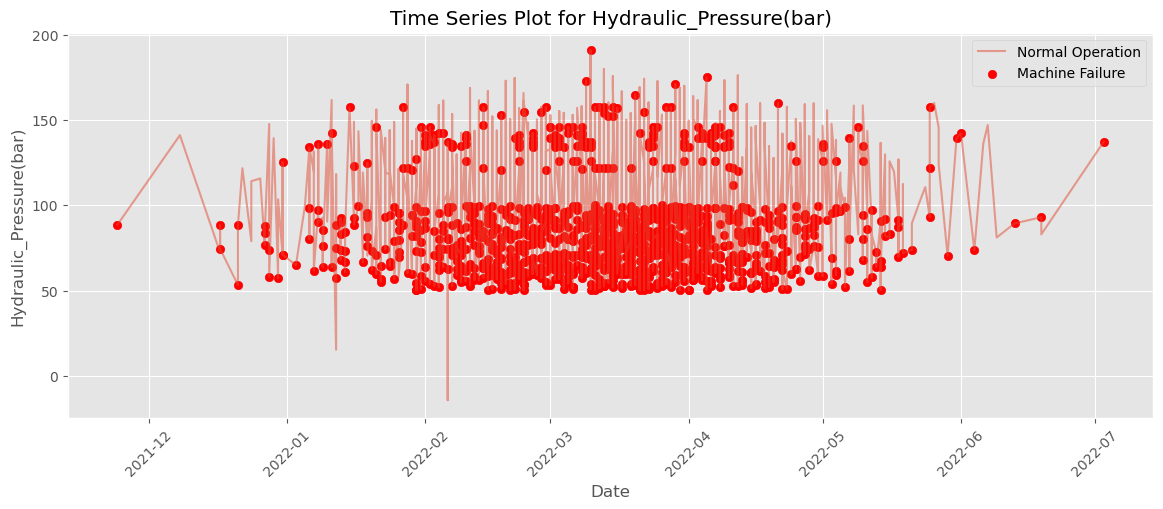

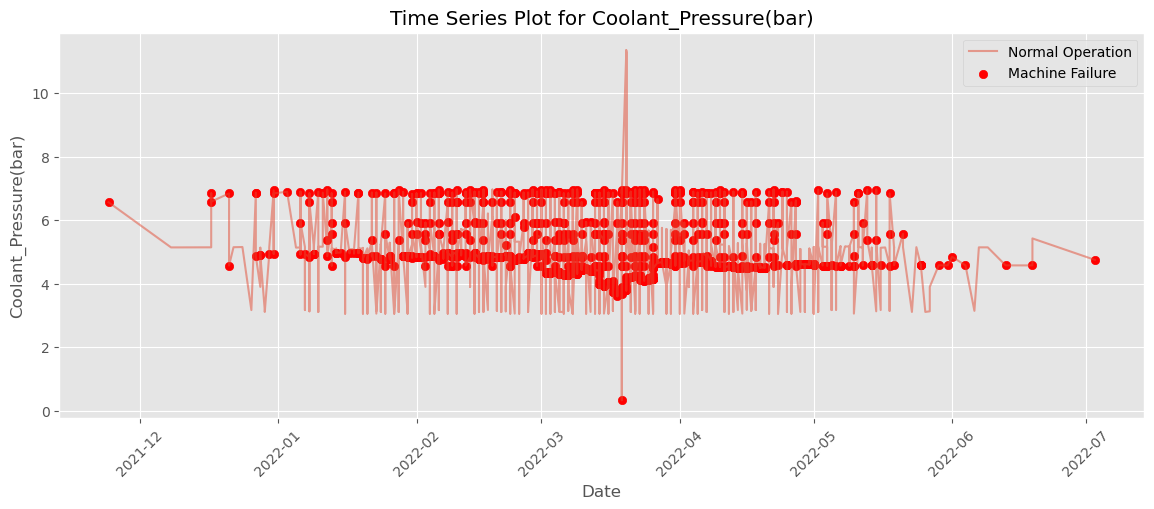

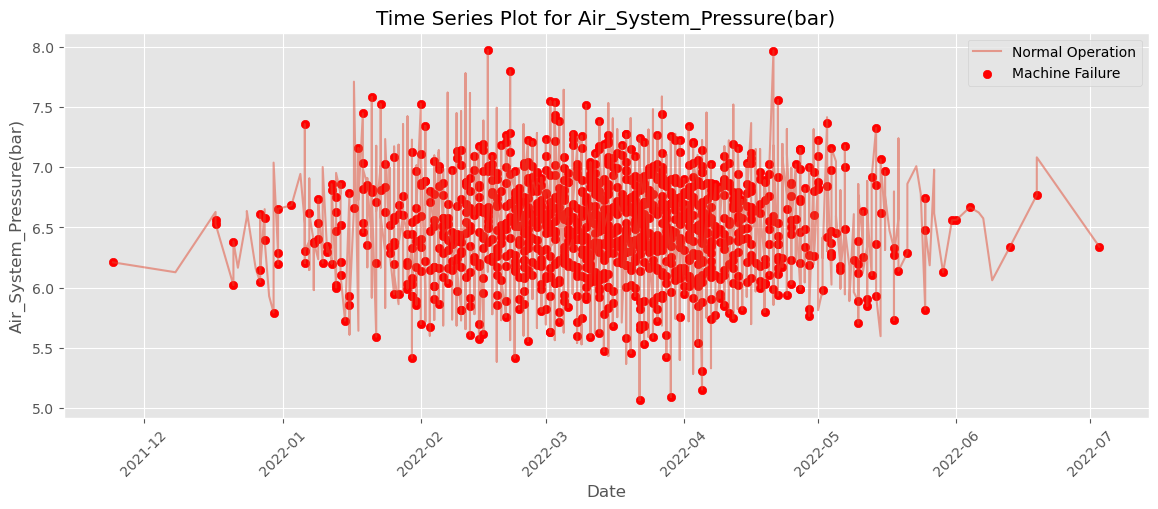

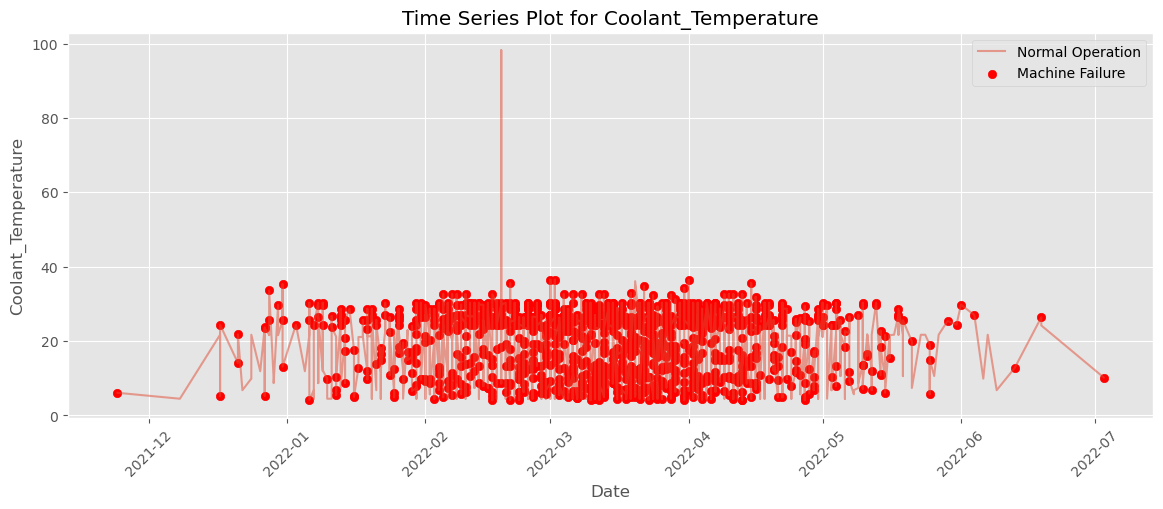

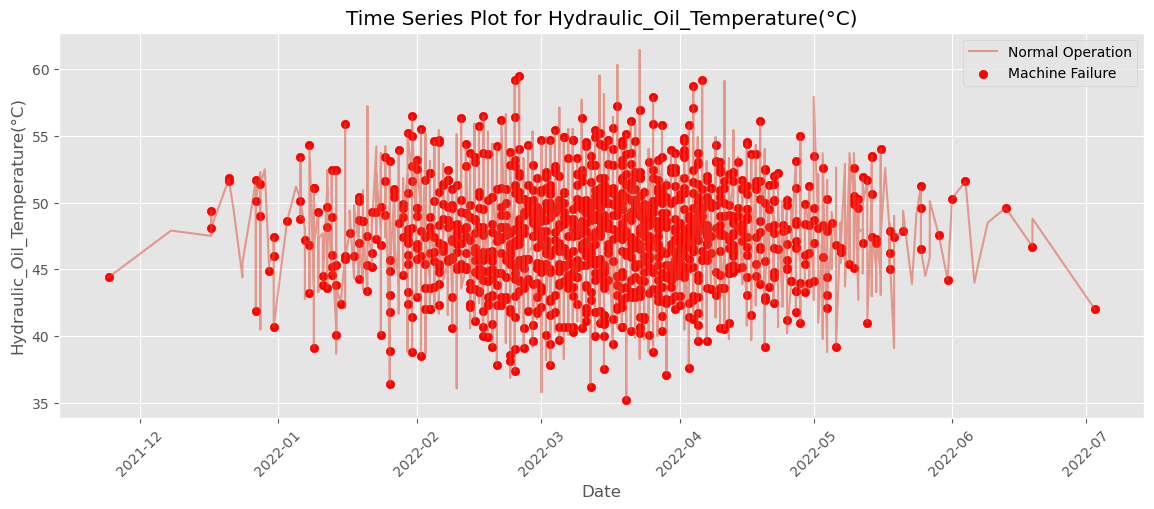

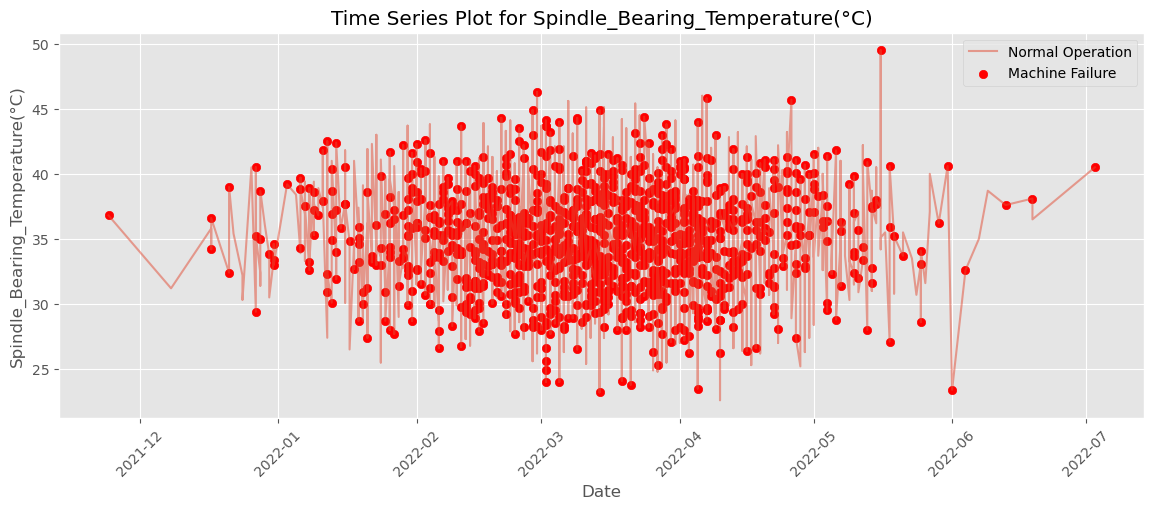

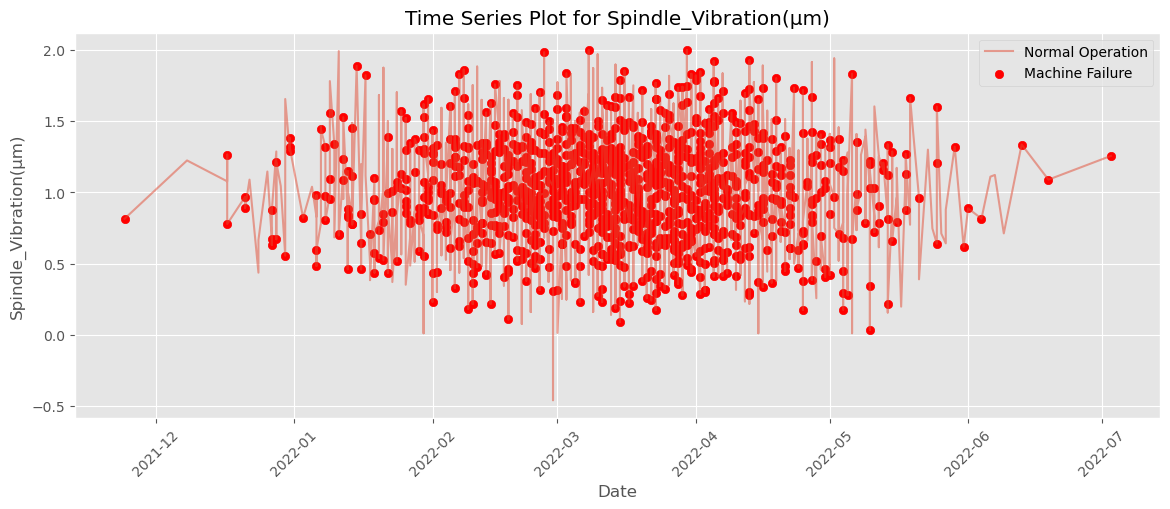

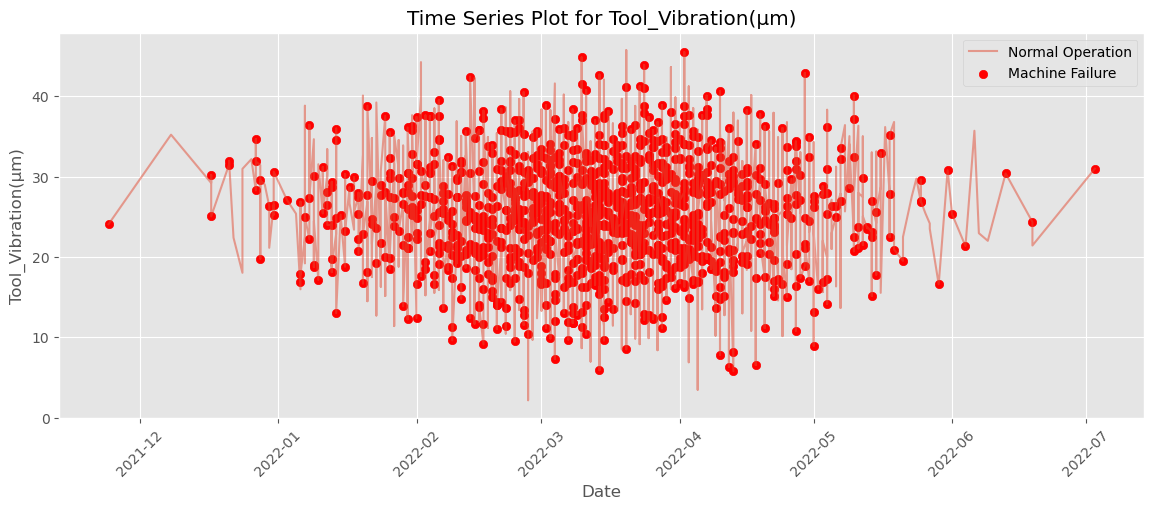

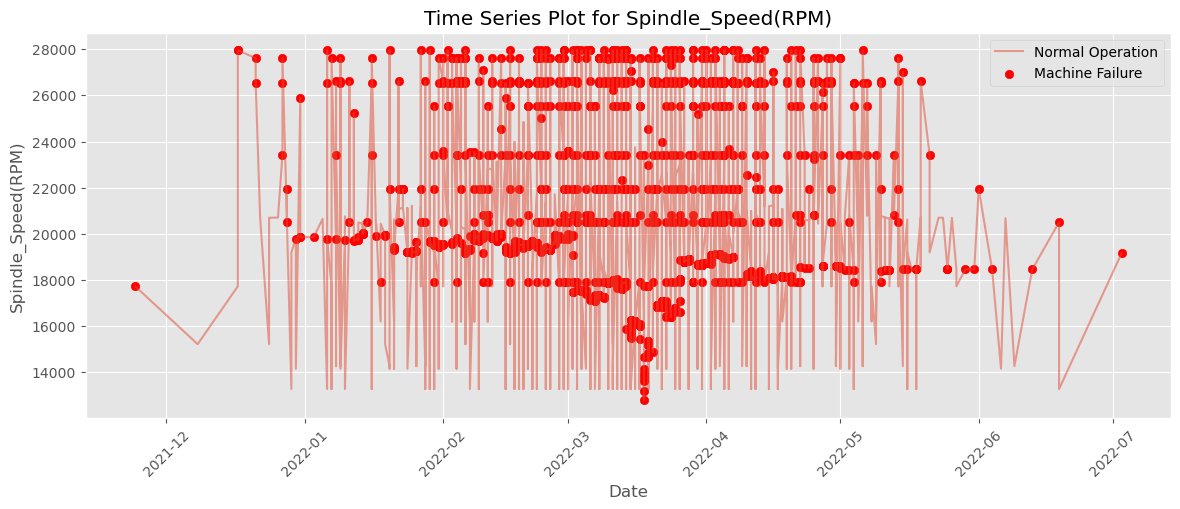

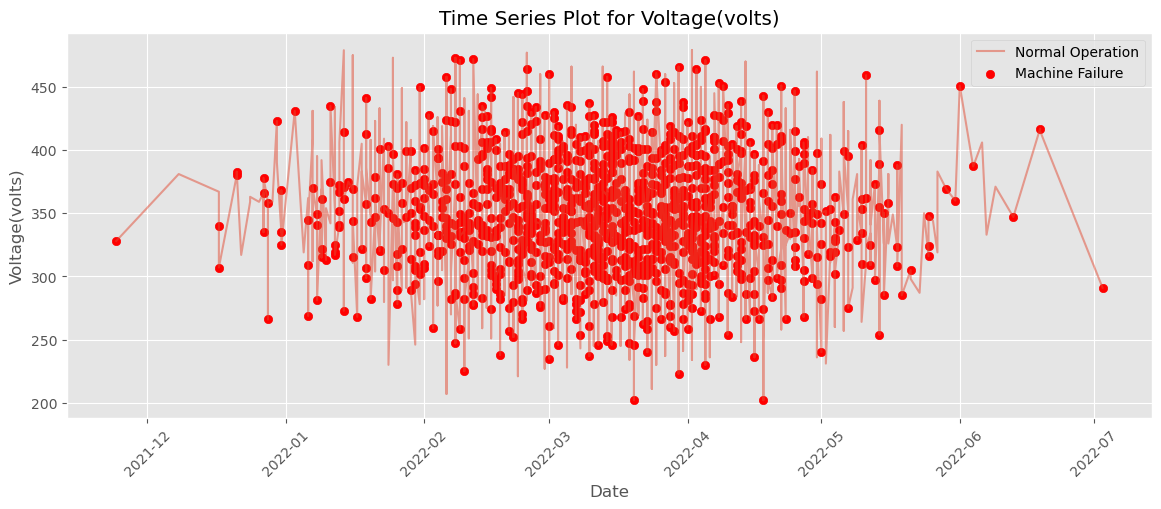

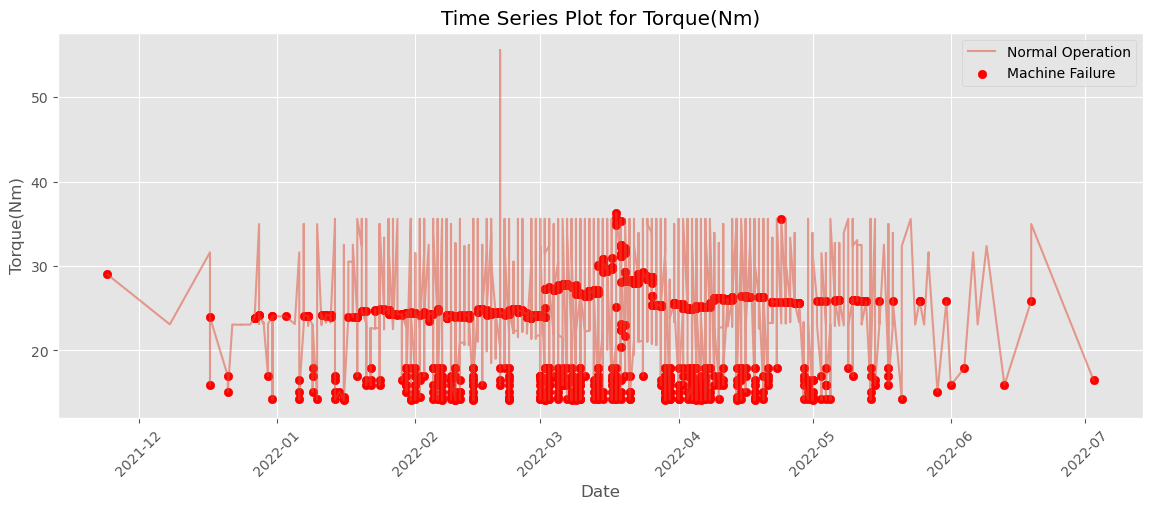

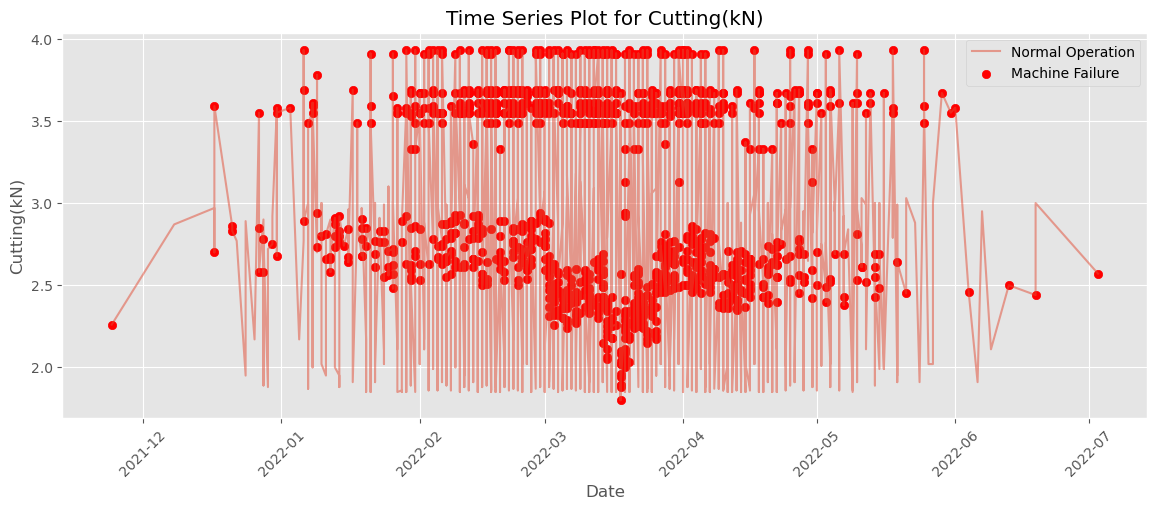

In [37]:
for column in df.select_dtypes(include=['float64', 'int32']).columns:
    plt.figure(figsize=(14, 5))

    plt.plot(df['Date'], df[column], label='Normal Operation', alpha=0.5)
    
    failure_data = df[df['Downtime'] == 'Machine_Failure']
    if not failure_data.empty:
        plt.scatter(failure_data['Date'], failure_data[column], color='red', label='Machine Failure')

    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

#### Obeservation:
1. There is no sign of significant pattern in the individual feature (Hydraulic Pressure, Air System Pressure, Coolant Temperature, Hydraulic oil Temperature, Spindle Bearing Temperature, Spindle Vibration, Tool Vibration, and Voltage) which shows when a machine is downtime per month
2. There is sign of pattern in the individual feature of machine in Coolant Pressure which shows almost no machine downtime under 4 in every month, except in period of 2022-03 - 2022-04 there is a slight sign of machine downtime under value of 4
3. Sign of pattern found in individual feature of machine in Spindle Speed which show no machine downtime exery month when spindle speed value is under 18000, except in period of 2022-03 - 2022-04
4. The sign of pattern also found in Torque feature where there is almost no machine downtime when the value of torque is up +- 25 except in period of 2022-03 - 2022-04
5. Similar pattern also found in Cutting feature where there is almost no machine downtime under +- 2.4 value of cutting except in period of 2022-03 - 2022-04

###### Distribution of Machine Parameter Data Prior to Downtime Status

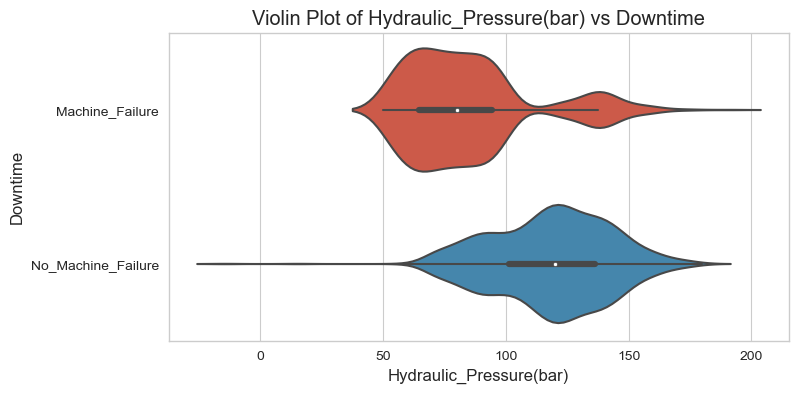

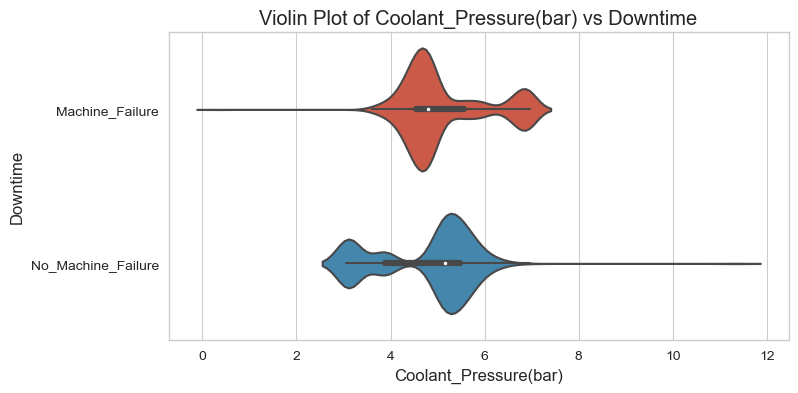

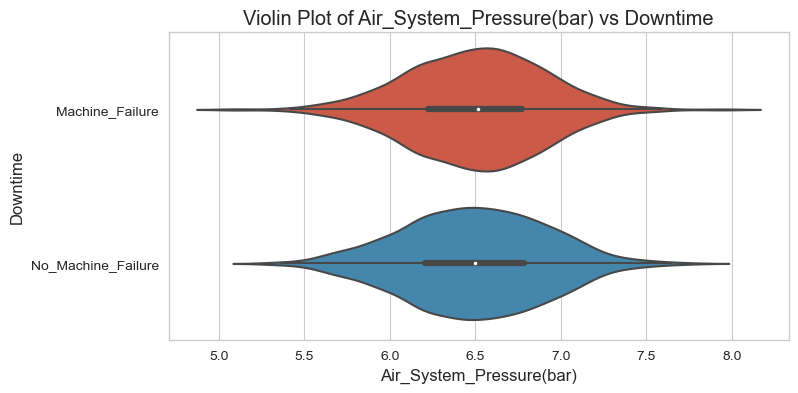

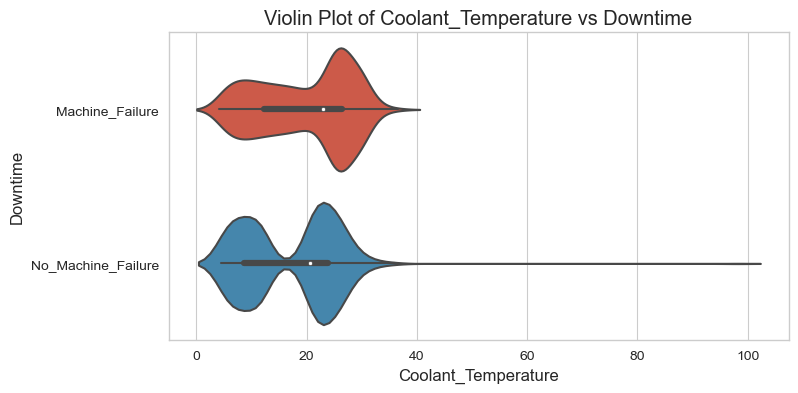

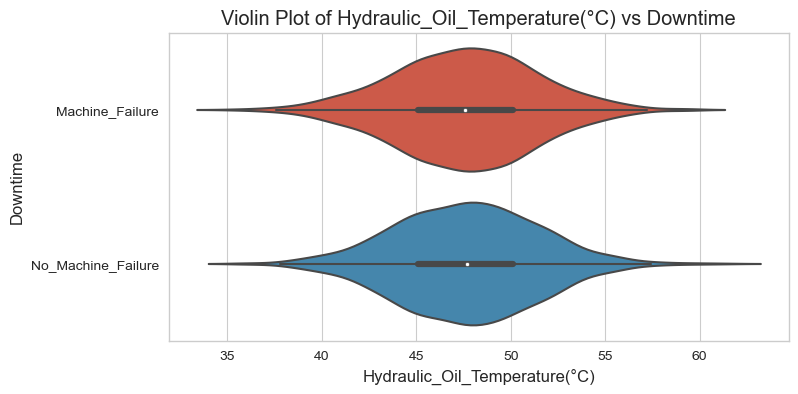

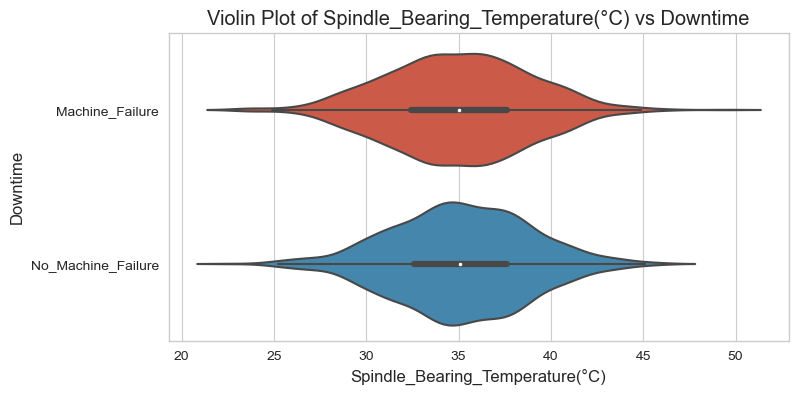

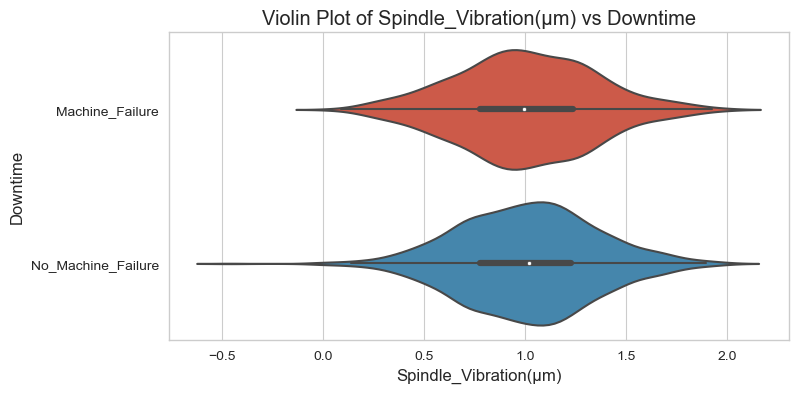

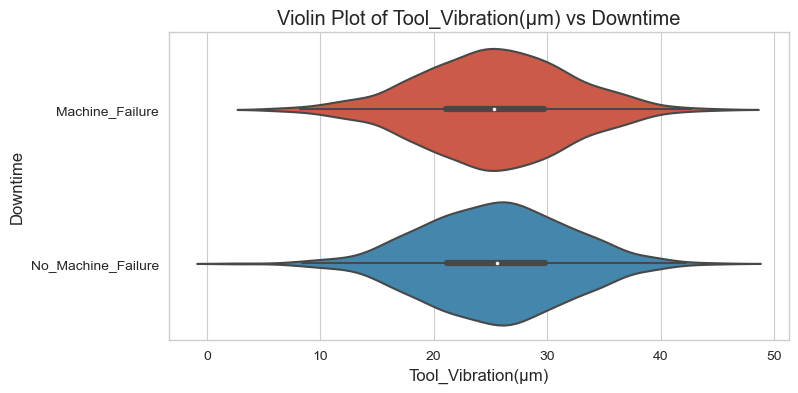

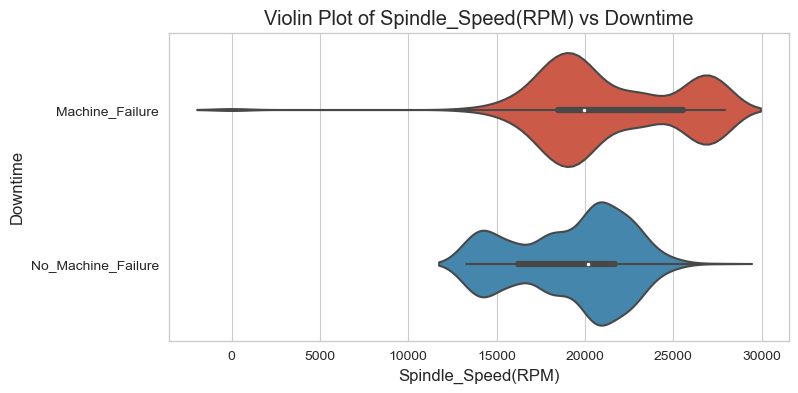

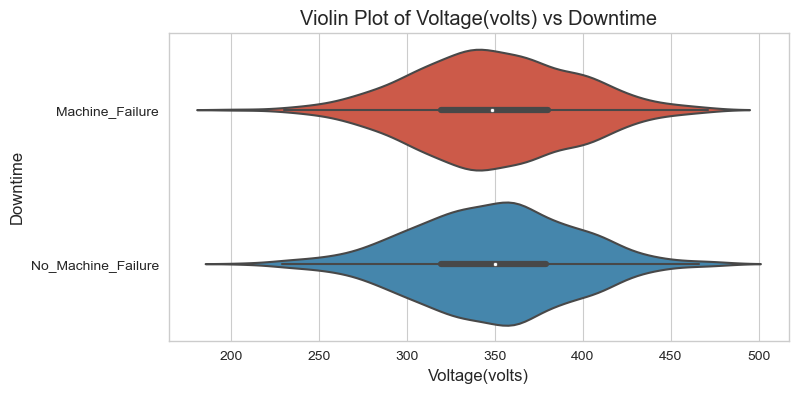

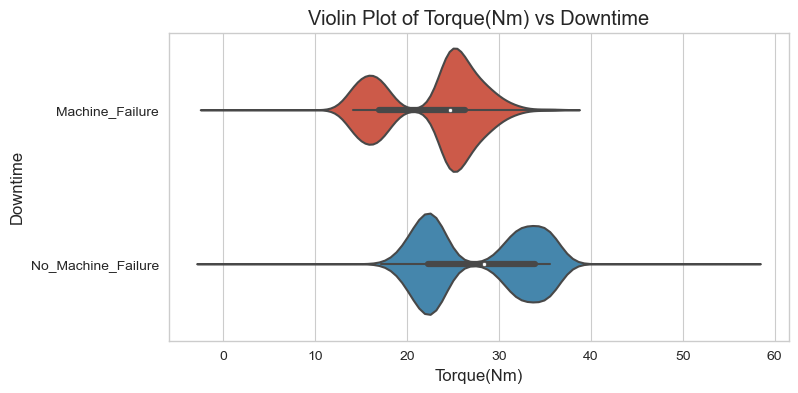

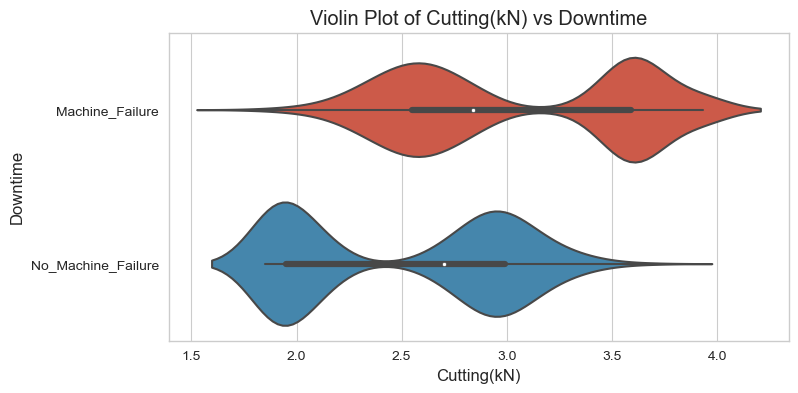

In [33]:
numerical_columns = [
    'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 
    'Air_System_Pressure(bar)', 'Coolant_Temperature', 
    'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)', 
    'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 
    'Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'
]

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(y='Downtime', x=column, data=df, orient='h')
    plt.title(f'Violin Plot of {column} vs Downtime')
    plt.show()

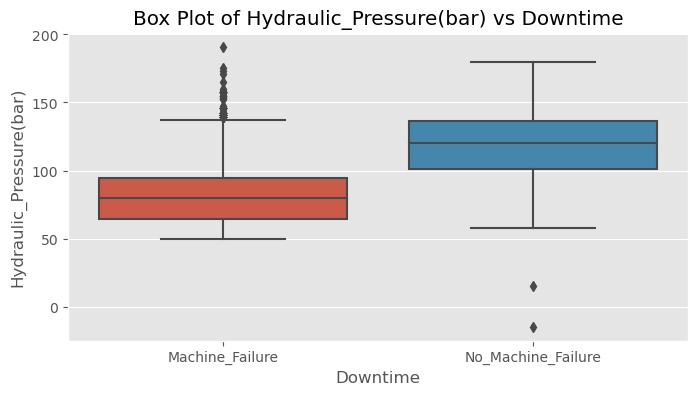

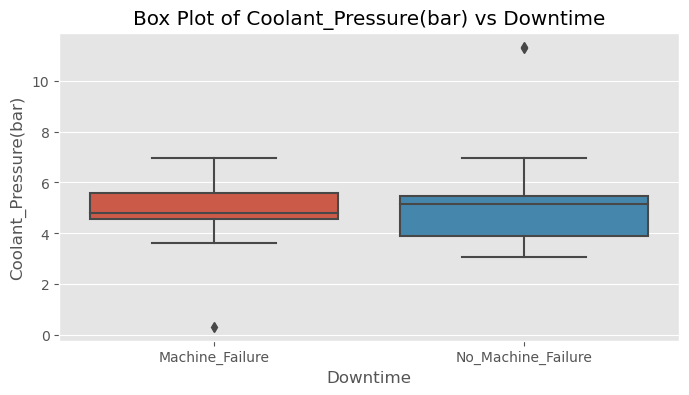

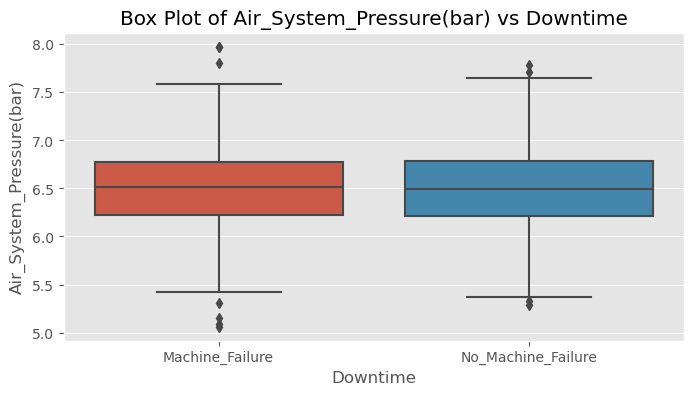

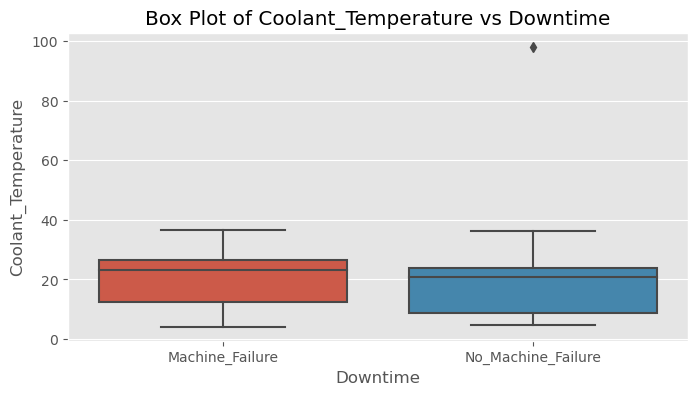

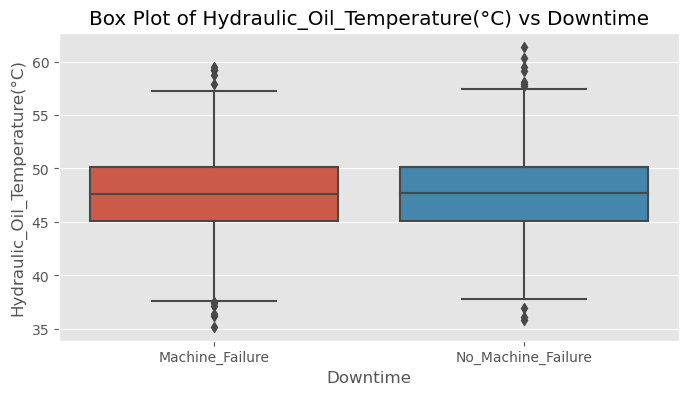

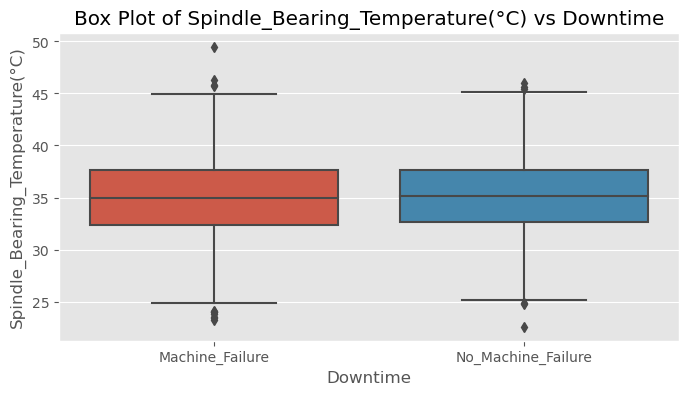

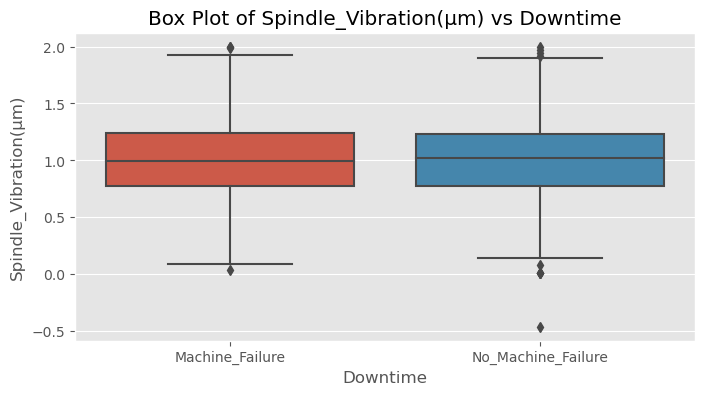

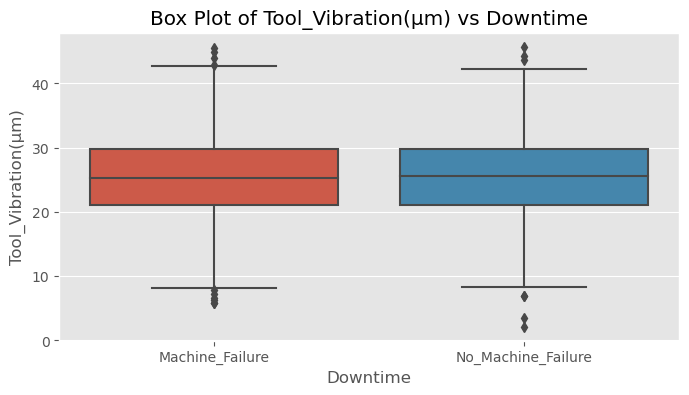

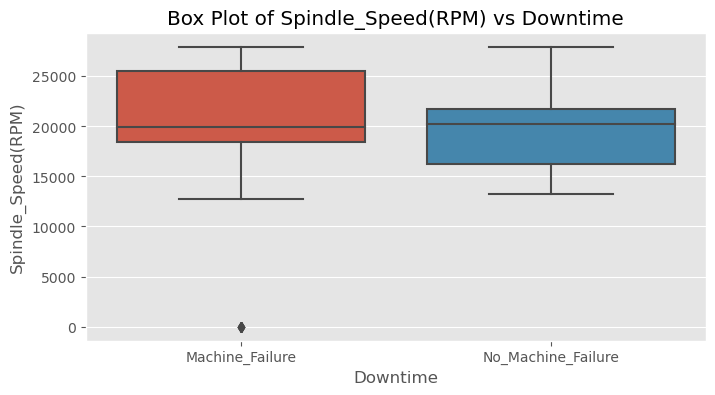

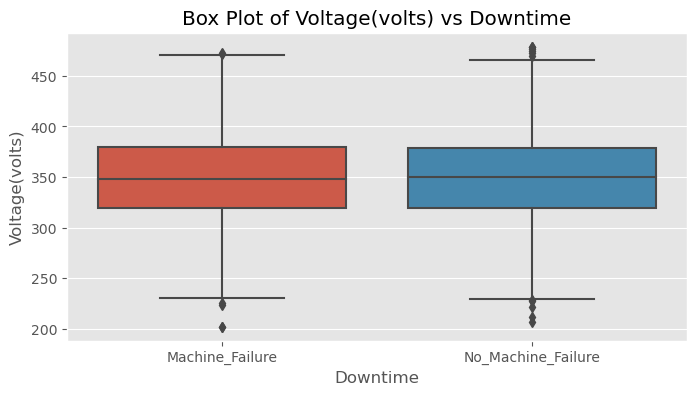

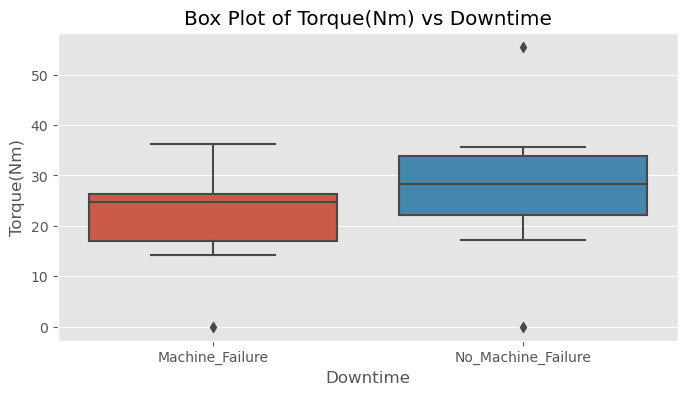

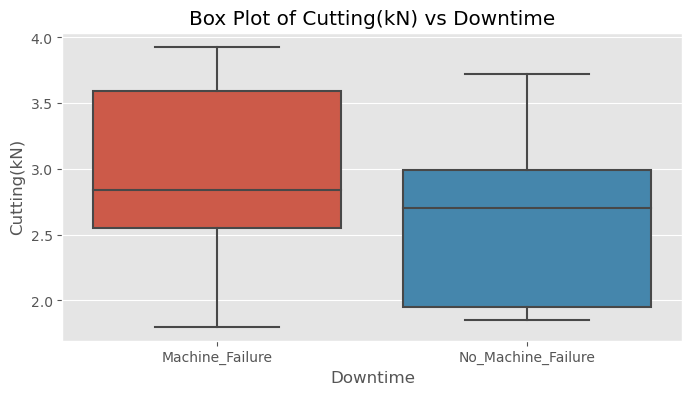

In [6]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Downtime', y=column, data=df)
    plt.title(f'Box Plot of {column} vs Downtime')
    plt.show()

#### Observation
1. Hydraulic Pressure: Hydraulic pressure when machine failure have slightly low pressure bar comparing to when no machine failure. Both categorical is symetric. An extreme value of pressure lead to machine failure, but low pressure is the most of it. The variablity is almost the same between two categorical feature.
2. Coolant Pressure: Coolant pressure when machine failure show wider range and skew toward lower values comparing to no machine failure, with slight high value coolant pressure. In other hand, no machine failure show wider range and skew toward higher value, with slight low valuve coolant temperature.
3. Air System Pressure: Air system pressure when machine failure is almost the same with when the machine is no failure. the skew and wider range centered in same range. The inter-quartile range between the two category is almost the same as well in the value of 6,5. It could suggest the factor of air system pressure in machine downtime is minimal.
4. Coolant Temperature: Machine Failure have higher value of central tendency (median) comparing to No Machine Failure, The distribution of data when Machine Failure tend to have slighly higher value, this can be conclude with the high data frequency around the median. The plot shows that Machine Failure have more variabiity on the lower value data.
5. Hydraulic Oil Temperature: There are no noticeable differences between two data in term of central tendency, spread and range, density, and distribution shape.A small difference on the median where Machine Failure have slightly lower centrality.
6. Spindle Bearing Temperature: There are no noticeable differences between two data. Only the median of Machine Failure slightly lower and the IQR slightly larger.
7. Spindle Vibration: Central tendency of Machine Failure slightly lower comparing to No Machine Failure, the density of two data revolved around the median, Machine Failure larger density is slightly lower to Machine Failure, shape, variability, and range of the two data does not have significance differences.
8. Tool Vibration: There are no noticeable difference for the two data in term of central tendency, density, spread and variability, and shape. Machine Failure have a slightly larger density area in the upper value and No Machine Value have a slightly larger density area in the lower value.
9. Spindle Speed: The central tendency almost look the same between the two data. It is noticeable that the shape of the distribution also look the same but with different 'head' orientation. 50% of the data in Machine Failure tend to have higher value comparing to No Machine Failure. Machine Failure' largest density is slightly lower than No Machine Failure, but exhibits a distribution that extends to higher spindle speeds value. In other hand, No Machine Failure state shows a denser concentration of data points at lower spindle speeds.
10. Voltage: There are no noticeable difference in term of median, spread and variability, density, and distribution shape.
11. Torque: Both have bimodal distribution shape, with Machine Failure have lower central tendency and IQR (50% of the data), the each other 'head' of the data distribution is on opposite direction. Machine Failure largest density is slightly higher than No Machine Failure, but exhibits a distribution that extends to lower torque value. In other hand, No Machine Failure largest density is slightly lower that Machine Failure but exhibits distribution that extends to higher torque value.
12. Cutting: Both bimodal distribution shape. Machine Failure data have slightly higher central tendency and range of IQR. No_Machine_Failure extending to the lower and upper extremes of the plot. However, the Machine_Failure violin seems to have a slightly more extended upper range. The violins’ width at different points indicates the density of observations. For 'Machine_Failure', the distribution is wider in the middle, suggesting a higher density of cutting force values in this region compared to 'No_Machine_Failure'. The 'No_Machine_Failure' state shows a slightly slimmer profile at the higher values of cutting force.

#### Point Biserial Correlation Between Machine Parameters and Downtime

In [34]:
df['Downtime_Binary'] = df['Downtime'].apply(lambda x: 1 if x == 'Machine_Failure' else 0)
correlation_coeffs = {}
for column in numerical_columns:
    clean_df = df.dropna(subset=[column, 'Downtime_Binary'])
    clean_df = clean_df.replace([np.inf, -np.inf], np.nan).dropna(subset=[column, 'Downtime_Binary'])
    if clean_df[column].notna().sum() > 1:
        correlation, p_value = pointbiserialr(clean_df['Downtime_Binary'], clean_df[column])
        correlation_coeffs[column] = {'correlation_coefficient': correlation, 'p_value': "{:.2f}".format(p_value)}
    else:
        correlation_coeffs[column] = {'correlation_coefficient': None, 'p_value': None}
correlation_df = pd.DataFrame.from_dict(correlation_coeffs, orient='index')
print(correlation_df)

                                 correlation_coefficient p_value
Hydraulic_Pressure(bar)                        -0.558218    0.00
Coolant_Pressure(bar)                           0.171678    0.00
Air_System_Pressure(bar)                        0.009213    0.65
Coolant_Temperature                             0.169235    0.00
Hydraulic_Oil_Temperature(°C)                  -0.012647    0.53
Spindle_Bearing_Temperature(°C)                -0.019472    0.33
Spindle_Vibration(µm)                          -0.016665    0.41
Tool_Vibration(µm)                             -0.005889    0.77
Spindle_Speed(RPM)                              0.275127    0.00
Voltage(volts)                                  0.005853    0.77
Torque(Nm)                                     -0.408505    0.00
Cutting(kN)                                     0.450093    0.00


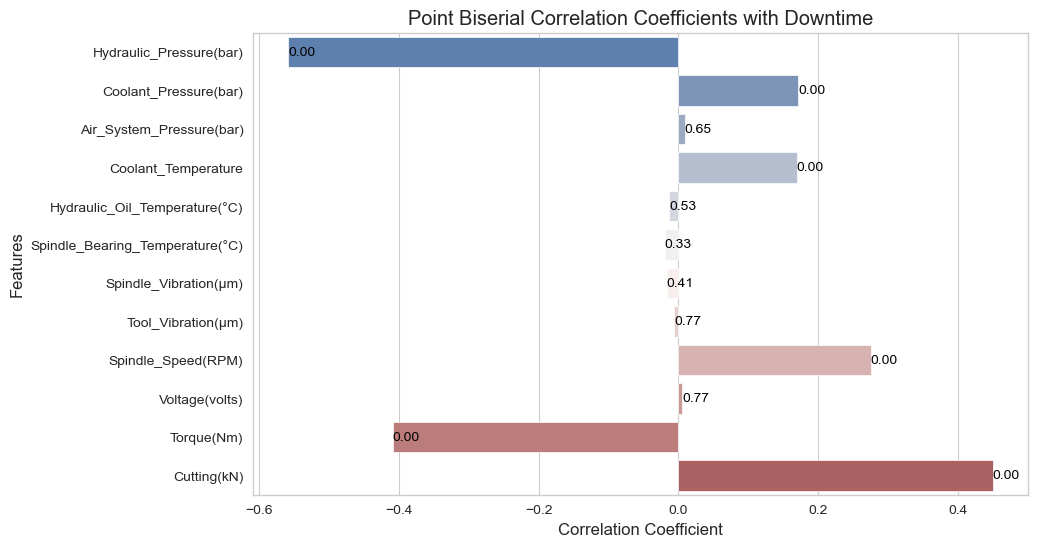

In [36]:
correlation_df = pd.DataFrame.from_dict(correlation_coeffs, orient='index').reset_index()
correlation_df.columns = ['Feature', 'Correlation Coefficient', 'P-value']
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=correlation_df, x='Correlation Coefficient', y='Feature', palette='vlag')

for index, row in correlation_df.iterrows():
    barplot.text(row['Correlation Coefficient'], index, f"{row['P-value']}", color='black', va='center')
plt.title('Point Biserial Correlation Coefficients with Downtime')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

#### Observation
1. Hydraulic Pressure: With a correlation coefficient of -0.55 and a p-value of 0.00, this suggests a strong, statistically significant negative correlation. Lower hydraulic pressure is highly correlated with increased downtime.
2. Coolant Pressure: A correlation coefficient of 0.17 with a p-value of 0.00 indicates a weak yet statistically significant positive correlation with machine downtime. Even a small increase in coolant pressure is associated with downtime.
3. Air System Pressure: Shows a correlation coefficient of 0.09 and a p-value of 0.65, indicating a very weak and non-significant positive correlation with downtime.
4. Coolant Temperature: A correlation coefficient of 0.16 with a p-value of 0.00, suggesting a weak but statistically significant positive correlation with downtime.
5. Hydraulic Oil Temperature: The coefficient is -0.21 with a p-value of 0.53, indicating a weak negative correlation that is not statistically significant.
6. Spindle Bearing Temperature: With a coefficient of -0.19 and a p-value of 0.33, it shows a weak negative correlation, not statistically significant with downtime.
7. Spindle Vibration: Has a strong positive correlation with a coefficient of 0.77 and a p-value of 0.00, making it a significant and reliable indicator of machine downtime.
8. Tool Vibration: A correlation coefficient of -0.08 and a p-value of 0.77 indicate a very weak and non-significant negative correlation.
9. Spindle Speed: Shows a strong positive correlation with a coefficient of 0.27 and a p-value of 0.00, indicating it's a significant predictor of machine downtime.
10. Voltage: A correlation coefficient of 0.08 with a p-value of 0.77 indicates no significant correlation with downtime.
11. Torque: With a correlation coefficient of -0.48 and a p-value of 0.00, there is a moderate to strong negative correlation, and it's statistically significant, suggesting that lower torque is associated with increased machine downtime.
12. Cutting: Exhibits a moderate positive correlation with a coefficient of 0.45 and a p-value of 0.00, indicating a significant association with machine downtime.

#### Analyze Machine Load and Performance

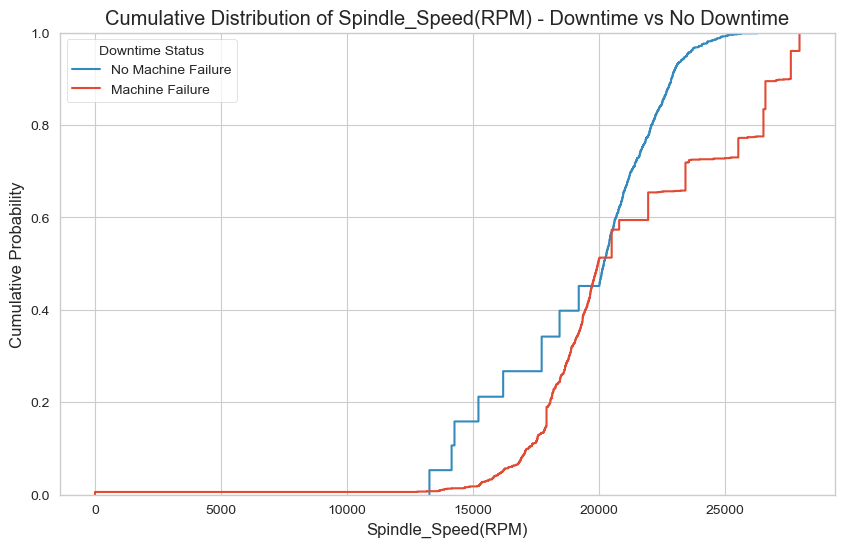

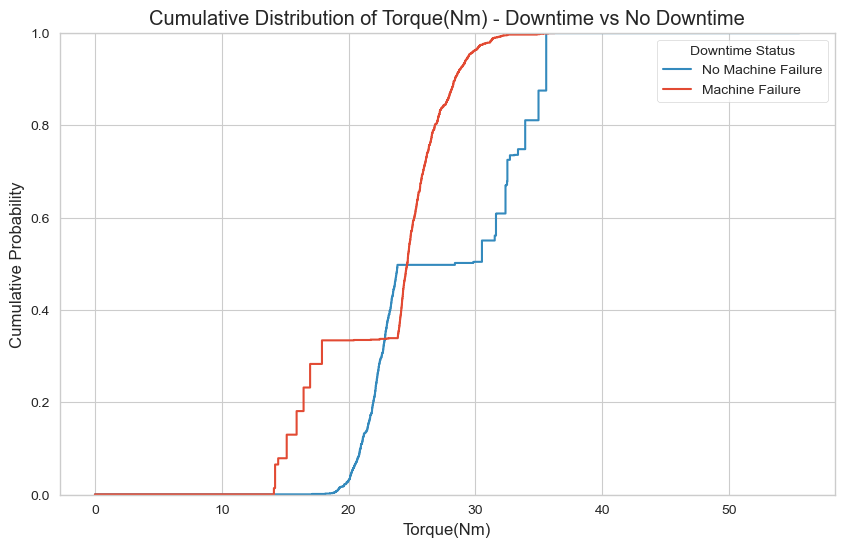

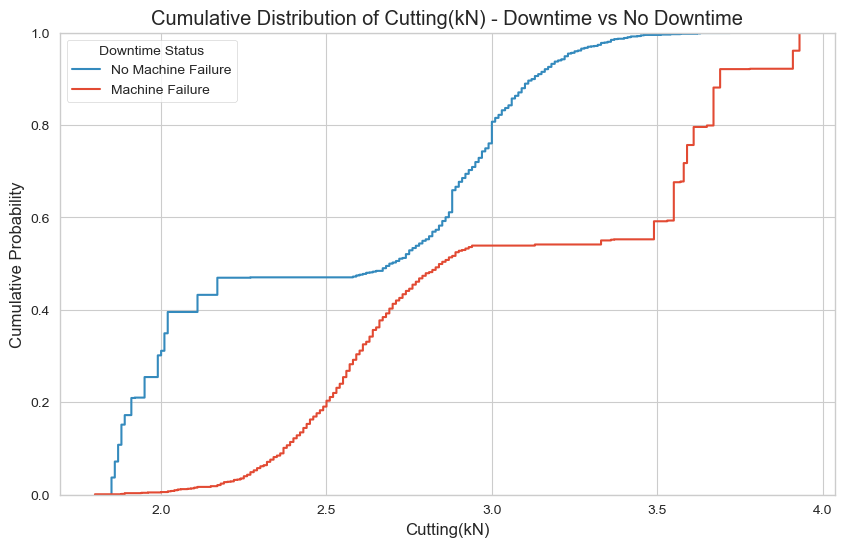

In [21]:
sns.set_style('whitegrid')

parameters = ['Spindle_Speed(RPM)', 'Torque(Nm)', 'Cutting(kN)']

for param in parameters:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x=param, hue='Downtime')
    plt.legend(title='Downtime Status', labels=['No Machine Failure', 'Machine Failure'])
    plt.title(f'Cumulative Distribution of {param} - Downtime vs No Downtime')
    plt.xlabel(param)
    plt.ylabel('Cumulative Probability')
    plt.show()

#### Observation
1. Spindle Speed: The ECDF for machine failure shifts to the right as compared to no machine failure, indicating that higher spindle speeds are more prevalent during machine failures. There is a clear separation between the two curves, especially in the mid-range of spindle speeds, suggesting a significant difference in the distribution of spindle speeds during normal operation versus failure.
2. Torque: The machine failure ECDF curve for torque is to the left of the no machine failure curve, which indicates that lower torque values are associated with machine failure. There is overlap at the mid-range of torque values, but at the lower end, the failure curve rises more steeply, suggesting that at very low torque levels, the probability of failure is higher.
3. Cutting: For cutting, the failure ECDF curve is generally below the no machine failure curve, indicating that machine failures are associated with higher cutting forces. The separation between the curves is most apparent at the higher values of cutting force, implying that when the cutting force reaches these higher values, the probability of machine failure increases substantially.

#### Analyze Machine Temperature Features

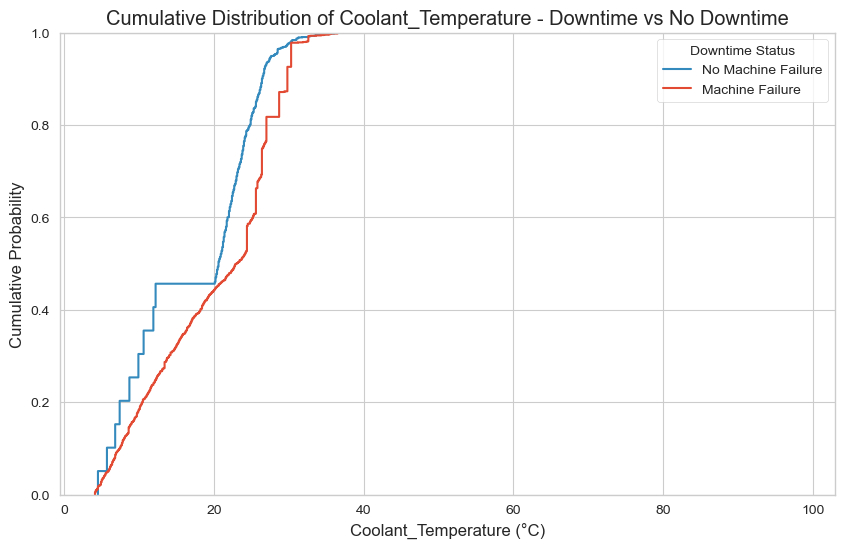

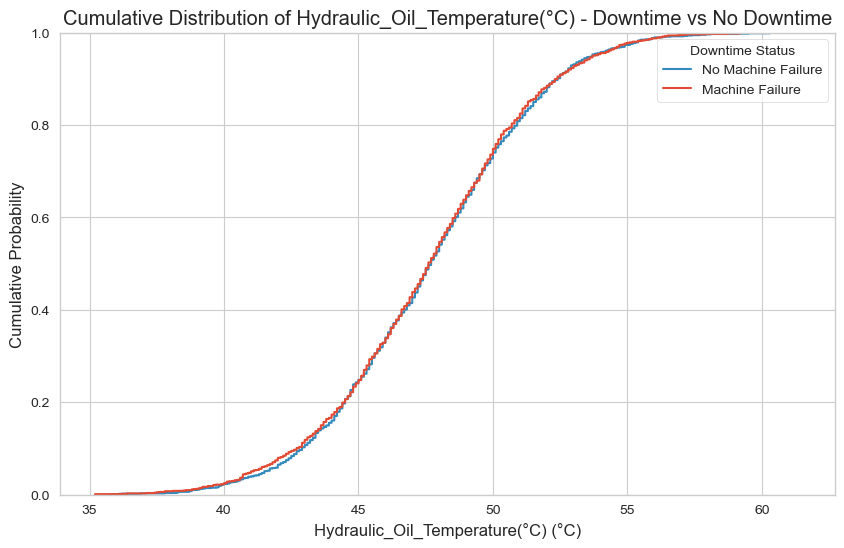

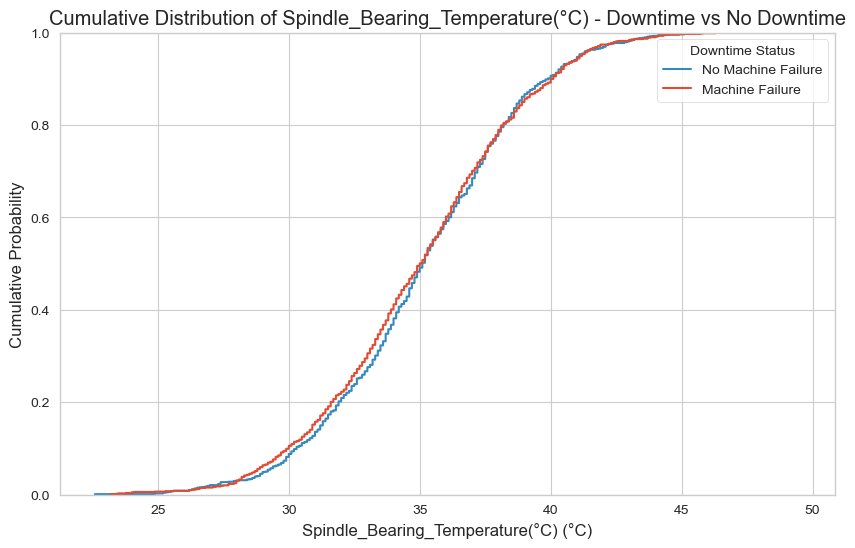

In [6]:
temperature_parameters = ['Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)']

for param in temperature_parameters:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x=param, hue='Downtime')
    plt.legend(title='Downtime Status', labels=['No Machine Failure', 'Machine Failure'])
    plt.title(f'Cumulative Distribution of {param} - Downtime vs No Downtime')
    plt.xlabel(param + ' (°C)')
    plt.ylabel('Cumulative Probability')
    plt.show()

#### Observation
1. Coolant Temperature: The curves for machine failure and no machine failure overlap significantly. There's a slight shift towards higher temperatures for machine failures. Elevated coolant temperatures appear to have a relationship with an increased likelihood of machine failure.
2. Hydraulic Oil Temperature: The distribution of temperatures during machine failure and no failure is almost identical. No distinct temperature threshold appears to separate normal operation from failure conditions.
3. Spindle Bearing Temperature: Similar to hydraulic oil temperature, the ECDF for both conditions is closely aligned. No clear differentiation in spindle bearing temperature is observed between failure and non-failure states.

#### Evaluate Pressure Parameters

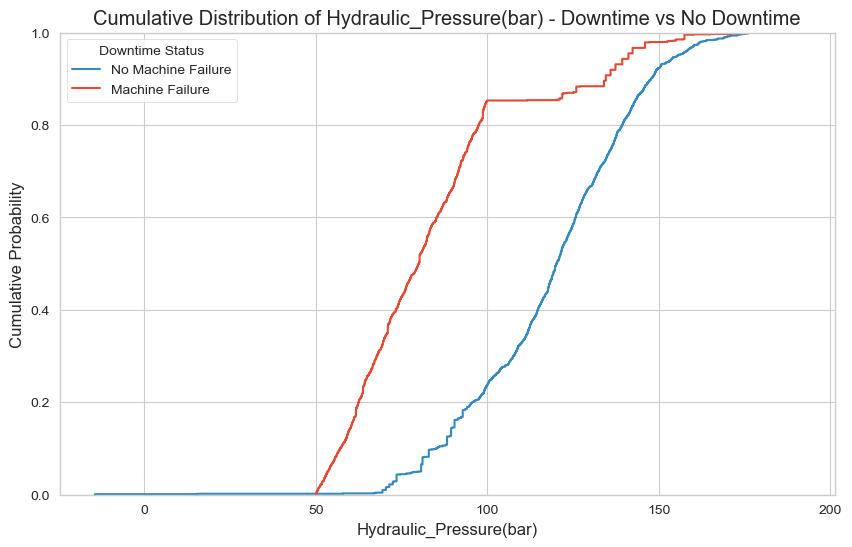

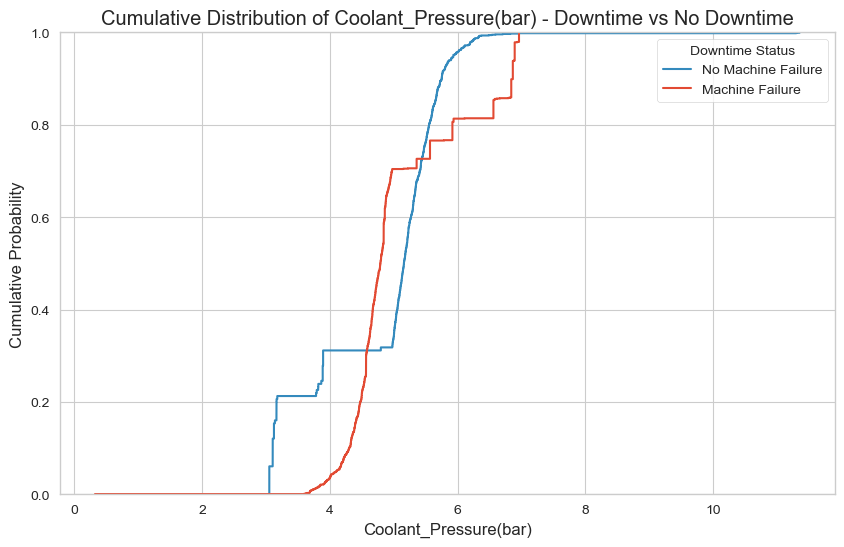

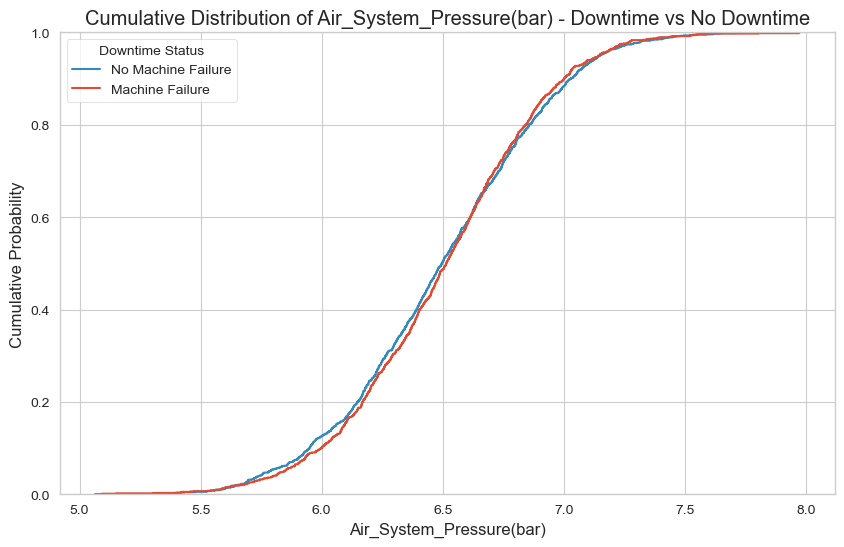

In [8]:
pressure_parameters = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)']

for param in pressure_parameters:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x=param, hue='Downtime')
    plt.legend(title='Downtime Status', labels=['No Machine Failure', 'Machine Failure'])
    plt.title(f'Cumulative Distribution of {param} - Downtime vs No Downtime')
    plt.xlabel(param)
    plt.ylabel('Cumulative Probability')
    plt.show()

#### Observation
1. Hydraulic Pressure: There is a distinct separation between the failure and no-failure curves. Failures are associated with lower hydraulic pressures.
2. Coolant Pressure: The failure curve is shifted towards the lower pressure values compared to the no-failure curve. Lower coolant pressures seem to be related to machine failures.
3. Air System Pressure: The curves for failure and no-failure conditions overlap significantly. There doesn't seem to be a distinct pressure range that is strongly associated with machine failures.

#### Analyze Machine Vibration Parameters

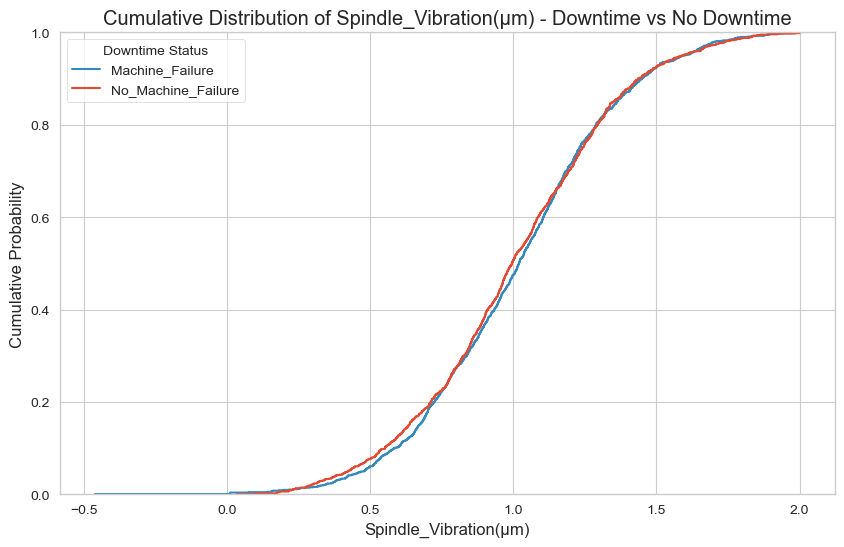

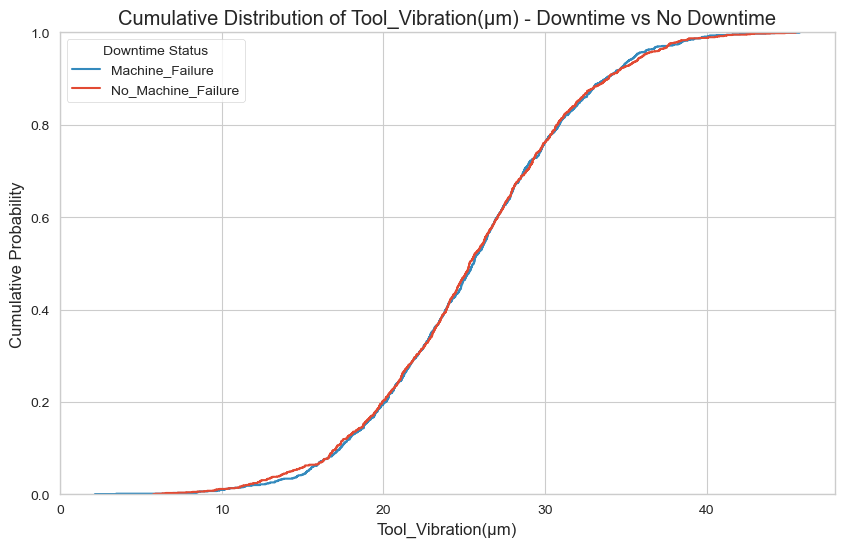

In [18]:
vibration_parameters = ['Spindle_Vibration(µm)', 'Tool_Vibration(µm)']

for param in vibration_parameters:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x=param, hue='Downtime')
    plt.title(f'Cumulative Distribution of {param} - Downtime vs No Downtime')
    plt.xlabel(param)
    plt.ylabel('Cumulative Probability')
    unique_labels = df['Downtime'].unique()
    plt.legend(title='Downtime Status', labels=unique_labels)
    plt.show()

#### Observation
1. Spindle Vibration: The curves for machine failure and no failure overlap significantly. There's no evident separation between the conditions, indicating that spindle vibration alone may not be a strong predictor of machine failure.
2. Tool Vibration: Similar to spindle vibration, the ECDF curves for failure and non-failure conditions are closely aligned. No distinct threshold or pattern indicates a strong correlation between tool vibration levels and machine failure.

#### Machine Utilization Versus Downtime

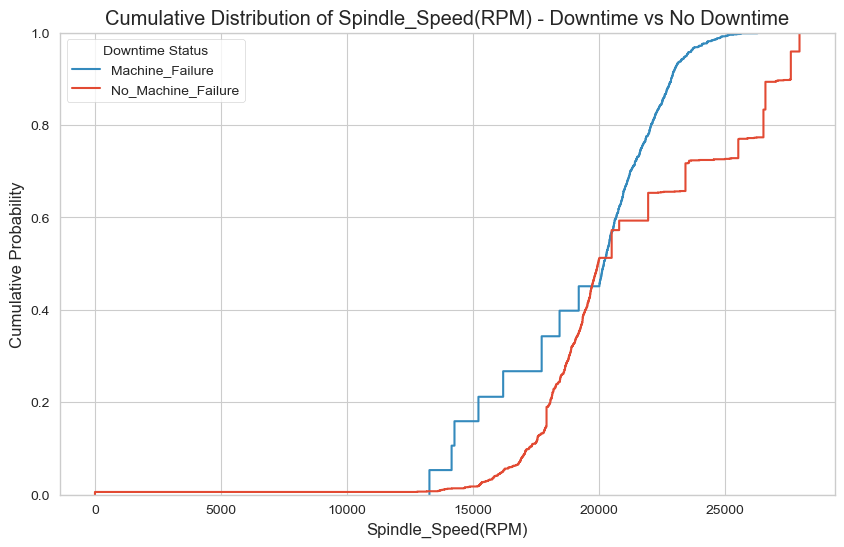

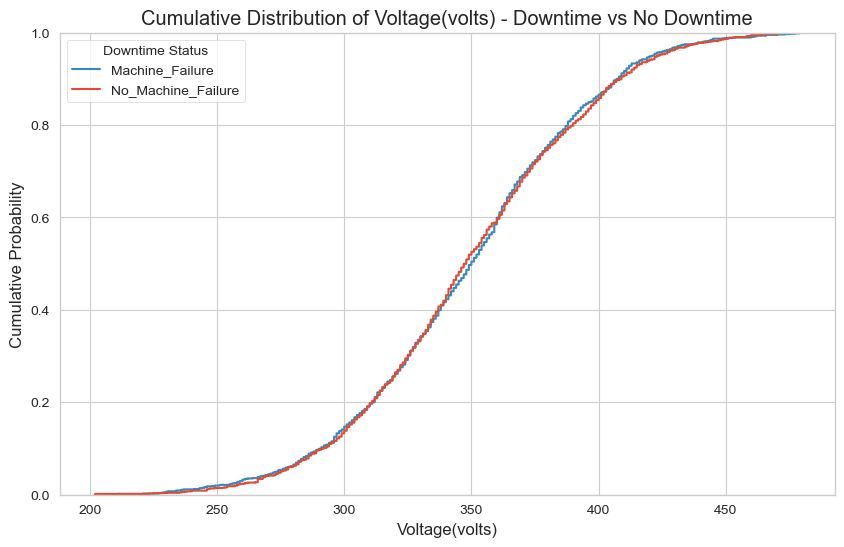

In [19]:
machine_util = ['Spindle_Speed(RPM)','Voltage(volts)']

for param in machine_util:
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=df, x=param, hue='Downtime')
    plt.title(f'Cumulative Distribution of {param} - Downtime vs No Downtime')
    plt.xlabel(param)
    plt.ylabel('Cumulative Probability')
    unique_labels = df['Downtime'].unique()
    plt.legend(title='Downtime Status', labels=unique_labels)
    plt.show()

#### Observation
1. Spindle Speed: The ECDF for machine failure shifts to higher spindle speeds, suggesting that failures are more likely when the spindle is operating at higher speeds.
2. Voltage: The ECDF curves for voltage overlap closely between the machine failure and no machine failure conditions, indicating that voltage levels are not distinctly different in the two scenarios and may not be a primary factor in predicting machine failure.

#### Analyze Assembly Line Performance

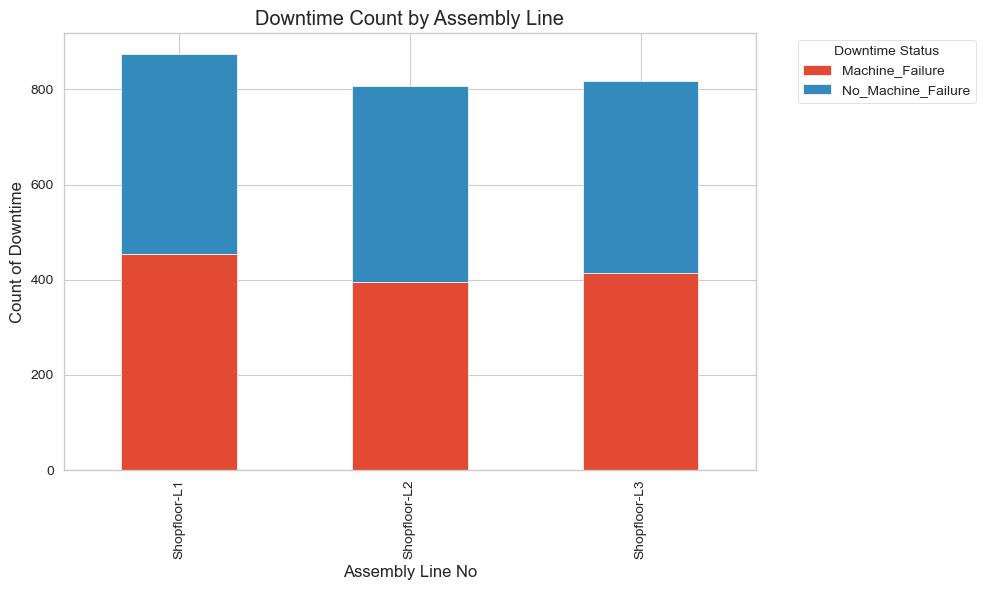

In [30]:
downtime_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(title='Downtime Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Downtime Count by Assembly Line')
plt.xlabel('Assembly Line No')
plt.ylabel('Count of Downtime')
plt.tight_layout()
plt.show()

#### Observation
1. Assembly Line 3 shows the highest total count of downtime events, with machine failures representing a substantial portion of these.
2. Assembly Line 1 and 2 have a lower total number of downtimes, with Assembly Line 2 showing the lowest number of machine failure-related downtimes.
3. The ratio of machine failure to no machine failure is relatively similar across Assembly Lines 1 and 2, while Assembly Line 3 has a slightly higher proportion of machine failure-related downtimes.

#### Machine Specific Downtime

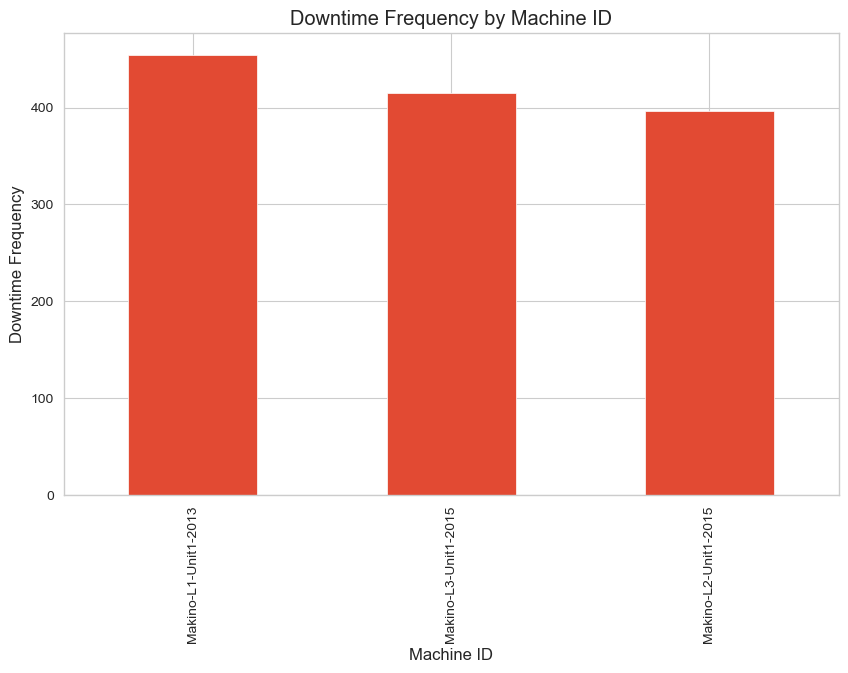

In [37]:
downtime_counts = df.groupby('Machine_ID')['Downtime_Binary'].sum()
downtime_counts.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Downtime Frequency by Machine ID')
plt.xlabel('Machine ID')
plt.ylabel('Downtime Frequency')
plt.show()

#### Observation
1. Machine ID 1 has the highest number of downtimes compared to the other two machines.
2. Machine ID 3 has slightly fewer downtimes than Machine ID 1, but still more than Machine ID 2.
3. Machine ID 2 has the lowest frequency of downtimes among the three.